## Проект по созданию системы оценки риска ДТП для каршеринговой компании

**Введение**
В условиях роста популярности каршеринговых сервисов безопасность движения становится критически важной задачей. Аварии, даже с незначительными повреждениями, могут привести к финансовым потерям, снижению доверия клиентов и увеличению эксплуатационных расходов. Для минимизации этих рисков заказчик — каршеринговая компания — инициировал разработку системы, которая оценивает вероятность ДТП на основе выбранного маршрута и исторических данных. Система должна предупреждать водителя о высоком уровне риска и предлагать рекомендации по его снижению. 

Проект находится на стадии предварительной проработки, и текущая задача — исследовать возможность создания такой системы, используя исторические данные по авариям за 2012 год из одного региона. Основной акцент делается на предсказание виновности участника ДТП (`at_fault`) для автомобилей (`party_type = 'car'`) с учётом возраста транспортного средства и других факторов. Результаты анализа должны ответить на вопросы:
- Возможно ли создать адекватную систему оценки риска?
- Какие факторы наиболее влияют на вероятность ДТП?
- Нужно ли оснащать автомобили дополнительными датчиками или камерами?

**Общее описание проекта**
Проект включает работу с базой данных, содержащей информацию о ДТП (`collisions`), участниках аварий (`parties`) и пострадавших транспортных средствах (`vehicles`). Данные за 2012 год будут использованы для построения модели машинного обучения, которая предсказывает вероятность виновности участника ДТП. Помимо моделирования, требуется провести статистический анализ факторов, влияющих на аварии, и предложить рекомендации по улучшению системы.

**Цели проекта**
1. Разработать модель машинного обучения для предсказания вероятности ДТП с учётом виновности участника (`at_fault`) для автомобилей.
2. Выявить ключевые факторы, влияющие на вероятность аварий, включая возраст автомобиля.
3. Оценить возможность создания системы оценки риска для каршеринга.
4. Предложить рекомендации по оснащению автомобилей и сбору дополнительных данных для повышения точности модели.

**Задачи проекта**
1. **Подключение к базе данных**:
   - Установить соединение с базой данных `data-science-vehicle-db`.
   - Проверить корректность подключения.

2. **Первичное исследование таблиц**:
   - Подтвердить наличие данных в таблицах `collisions`, `parties`, `vehicles`.
   - Проверить связность таблиц через ключи (`case_id`, `party_number`).
   - Оценить наличие пропусков и аномалий в данных.

3. **Статистический анализ факторов ДТП**:
   - Определить месяцы с наибольшим количеством аварий.
   - Построить визуализацию распределения ДТП по месяцам.
   - Сформулировать не менее 6 аналитических задач для коллег.
   - Решить 2 задачи с использованием связей между таблицами, включая визуализации и выводы.

4. **Подготовка данных для модели**:
   - Выгрузить данные за 2012 год с фильтрацией по `party_type = 'car'` и повреждениями (кроме `SCRATCH`).
   - Отобрать релевантные факторы, влияющие на вероятность ДТП.
   - Провести исследовательский анализ данных (EDA) и внести корректировки.
   - Подготовить обучающую и тестовую выборки с категоризацией и масштабированием данных.

5. **Создание и сравнение моделей**:
   - Построить не менее 3 моделей (например, Logistic Regression, Random Forest, CatBoost) с перебором гиперпараметров.
   - Выбрать метрику оценки (например, F1-score) и обосновать выбор.
   - Сравнить модели в таблице по метрике.

6. **Проверка лучшей модели**:
   - Построить матрицу ошибок, вычислить точность и полноту.
   - Проанализировать важность факторов.
   - Провести дополнительное исследование одного ключевого фактора с визуализацией зависимости.
   - Предложить оборудование для учёта этого фактора.

7. **Общий вывод**:
   - Описать лучшую модель.
   - Оценить возможность создания системы оценки риска.
   - Предложить дополнительные факторы и оборудование для улучшения модели.

**Ограничения**
- Данные ограничены 2012 годом.
- Участники ДТП — только автомобили (`party_type = 'car'`).
- Учитываются повреждения, кроме `SCRATCH`.
- Обязательное включение фактора возраста автомобиля.
- Решение реализуется в Jupyter Notebook с использованием SQL-запросов и Python.

**Ожидаемый результат**
- Модель машинного обучения с приемлемой точностью предсказания виновности в ДТП.
- Выявление ключевых факторов риска.
- Рекомендации по улучшению системы и оснащению автомобилей.

## Шаг 1. Загрузка таблиц SQL

### Импорты и настройки

In [1]:
# Стандартные библиотеки
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import time
from sqlalchemy.exc import OperationalError

# Манипуляция и анализ данных
import pandas as pd
import numpy as np
from scipy.stats import loguniform, randint

# Подключение к базе данных
import psycopg2
from sqlalchemy import create_engine

# Визуализация
import matplotlib.pyplot as plt
import seaborn as sns

# Статистический анализ
from scipy.stats import skew, variation
import phik

# Предобработка данных
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

# Модели машинного обучения
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.dummy import DummyClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.pipeline import Pipeline

# Метрики и оценка моделей
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score, accuracy_score, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import make_scorer
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Оптимизация и валидация
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, RandomizedSearchCV, StratifiedKFold
import optuna


# константы
TEST_SIZE = 0.2
RANDOM_STATE = 42
N_ITER = 10
N_FOLDS = 2

In [2]:
# Показывать все строки
pd.set_option('display.max_rows', None)

# Показывать все столбцы
pd.set_option('display.max_columns', None)

# Увеличить ширину столбцов (по желанию)
pd.set_option('display.max_colwidth', None)  # None — без ограничения длины ячеек

# Увеличить общую ширину таблицы
pd.set_option('display.width', None)  # None — автоматическая ширина

# Убедитесь, что не обрезаются строки
pd.set_option('display.expand_frame_repr', False)

pd.set_option('display.float_format', '{:.2f}'.format)

### Загрузка данных

In [3]:
# параметры подключения
db_config = {
    'user': 'praktikum_student',
    'pwd': 'Sdf4$2;d-d30pp',
    'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
    'port': 6432,
    'db': 'data-science-vehicle-db'
}

# создание подключения с пулом и тайм-аутом
connection_string = f"postgresql://{db_config['user']}:{db_config['pwd']}@{db_config['host']}:{db_config['port']}/{db_config['db']}?sslmode=require"
engine = create_engine(connection_string, pool_size=5, max_overflow=10, connect_args={'connect_timeout': 30})

# проверка подключения
try:
    with engine.connect() as conn:
        print("Подключение успешно")
except Exception as e:
    print(f"Ошибка подключения: {e}")

Подключение успешно


In [4]:
# функция для выполнения запроса с повторными попытками
def execute_query_with_retry(query, engine, retries=3, delay=5):
    for attempt in range(retries):
        try:
            return pd.read_sql_query(query, engine)
        except OperationalError as e:
            print(f"попытка {attempt + 1} не удалась: {e}")
            if attempt < retries - 1:
                time.sleep(delay)
            else:
                raise

In [5]:
# получение списка таблиц
query_tables = """
SELECT table_name
FROM information_schema.tables
WHERE table_schema = 'public'
"""
tables_df = pd.read_sql_query(query_tables, engine)
print("Список таблиц в базе данных:")
display(tables_df)

# обновление списка таблиц
tables = tables_df['table_name'].tolist()

Список таблиц в базе данных:


,table_name
0,case_ids
1,collisions
2,parties
3,vehicles


### Вывод по шагу 1:
- **Импорты и настройки**:  
  - Импортированы необходимые библиотеки.  
  - Настройки Pandas обеспечивают полное отображение данных.  
  - Риск: отображение больших таблиц может быть медленным.  
- **Подключение к базе данных**:  
  - Успешное подключение к базе `data-science-vehicle-db`.  
  - Использован пул соединений и тайм-аут для стабильности.  
  - Риск: возможны сбои подключения (решение: `execute_query_with_retry`).  
- **Список таблиц**:  
  - Обнаружены 4 таблицы: `case_ids`, `collisions`, `parties`, `vehicles`.  
- **Вывод**:  
  - Подключение и загрузка списка таблиц выполнены успешно.  
  - Готовность к анализу таблиц на шаге 2 подтверждена.  

## Шаг 2. Первичное исследование таблиц

**Задачи:**

- Проверить наличие данных в таблицах (case_ids, collisions, parties, vehicles).
- Подтвердить наличие общего ключа.
- Подтвердить соответсвие количества таблиц условию задачи (Текущая задача — понять, возможно ли предсказывать ДТП, опираясь на исторические данные одного из регионов).

In [6]:
# функция анализа таблицы
def check_df_sql(table_name, engine):
    print(f"\nАнализ таблицы {table_name}")
    
    # информация о столбцах
    query_info = f"""
    SELECT column_name, data_type, is_nullable
    FROM information_schema.columns
    WHERE table_name = '{table_name}' AND table_schema = 'public'
    """
    try:
        df_info = pd.read_sql_query(query_info, engine)
        print("Информация о столбцах:")
        display(df_info)
    except Exception as e:
        print(f"Ошибка при получении информации о столбцах: {e}")
        return
    
    # первые 20
    query_first = f"SELECT * FROM {table_name} LIMIT 20"
    try:
        df_first = pd.read_sql_query(query_first, engine)
        print("Первые 20 записей:")
        display(df_first)
    except Exception as e:
        print(f"Ошибка при получении записей: {e}")
        return
    
    # статистики для числовых столбцов
    numeric_cols = df_info[df_info['data_type'].isin(['integer', 'double precision', 'numeric', 'real'])]['column_name'].tolist()
    if numeric_cols:
        stats_list = []
        for col in numeric_cols:
            query_stats = f"""
            SELECT 
                '{col}' AS column_name,
                COUNT(*) AS count,
                COUNT(DISTINCT "{col}") AS unique,
                AVG("{col}"::float) AS mean,
                STDDEV("{col}"::float) AS std,
                MIN("{col}"::float) AS min,
                PERCENTILE_CONT(0.25) WITHIN GROUP (ORDER BY "{col}"::float) AS percentile_25,
                PERCENTILE_CONT(0.50) WITHIN GROUP (ORDER BY "{col}"::float) AS percentile_50,
                PERCENTILE_CONT(0.75) WITHIN GROUP (ORDER BY "{col}"::float) AS percentile_75,
                MAX("{col}"::float) AS max
            FROM {table_name}
            WHERE "{col}" IS NOT NULL
            """
            try:
                df_stats = execute_query_with_retry(query_stats, engine)
                stats_list.append(df_stats)
            except Exception as e:
                print(f"Ошибка при получении статистик для {col}: {e}")
        
        if stats_list:
            df_stats_numeric = pd.concat(stats_list)
            print("Статистики числовых столбцов:")
            display(df_stats_numeric)
    
    # статистики для нечисловых столбцов
    non_numeric_cols = df_info[~df_info['data_type'].isin(['integer', 'double precision', 'numeric', 'real'])]['column_name'].tolist()
    if non_numeric_cols:
        stats_list = []
        for col in non_numeric_cols:
            query_stats = f"""
            SELECT 
                '{col}' AS column_name,
                COUNT(*) AS count,
                COUNT(DISTINCT "{col}") AS unique,
                (SELECT "{col}" FROM {table_name} WHERE "{col}" IS NOT NULL GROUP BY "{col}" ORDER BY COUNT(*) DESC LIMIT 1) AS top,
                (SELECT COUNT(*) FROM {table_name} WHERE "{col}" = (SELECT "{col}" FROM {table_name} WHERE "{col}" IS NOT NULL GROUP BY "{col}" ORDER BY COUNT(*) DESC LIMIT 1)) AS freq
            FROM {table_name}
            WHERE "{col}" IS NOT NULL
            """
            try:
                df_stats = execute_query_with_retry(query_stats, engine)
                stats_list.append(df_stats)
            except Exception as e:
                print(f"Ошибка при получении статистик для {col}: {e}")
        
        if stats_list:
            df_stats_non_numeric = pd.concat(stats_list)
            print("Статистики нечисловых столбцов:")
            display(df_stats_non_numeric)
    
    # гистограммы
    if numeric_cols:
        num_plots = len(numeric_cols)
        cols_per_row = 3  # количество графиков в строке
        rows = (num_plots + cols_per_row - 1) // cols_per_row

        fig, axes = plt.subplots(rows, cols_per_row, figsize=(cols_per_row * 5, rows * 4))
        axes = axes.flatten()  # делаем одномерным, чтобы было проще обращаться

        for i, col in enumerate(numeric_cols):
            query_hist = f"""
            SELECT "{col}"::float AS value
            FROM {table_name}
            WHERE "{col}" IS NOT NULL
            """
            try:
                df_hist = pd.read_sql_query(query_hist, engine)
                sns.histplot(
                    df_hist['value'], 
                    bins=30, 
                    ax=axes[i], 
                    color='cornflowerblue', 
                    edgecolor='black'
                )
                axes[i].set_title(f'{col}', fontsize=11)
                axes[i].set_xlabel('')
                axes[i].set_ylabel('')
                axes[i].grid(True, linestyle='--', alpha=0.5)
            except Exception as e:
                print(f"Ошибка при построении гистограммы для {col}: {e}")
                axes[i].set_visible(False)

        # удалю пустые оси (если графиков меньше чем ячеек)
        for j in range(i + 1, len(axes)):
            axes[j].set_visible(False)

        fig.suptitle(f'Гистограммы числовых признаков (таблица {table_name})', fontsize=14)
        plt.tight_layout(rect=[0, 0, 1, 0.97])  # место под заголовок
        plt.show()
    else:
        print(f"В таблице {table_name} нет числовых столбцов для построения гистограмм.")

    # гистограммы для нечисловых (barplot топ-значений)
    if non_numeric_cols:
        num_plots = len(non_numeric_cols)
        cols_per_row = 3
        rows = (num_plots + cols_per_row - 1) // cols_per_row

        fig, axes = plt.subplots(rows, cols_per_row, figsize=(cols_per_row * 5, rows * 4))
        axes = axes.flatten()

        for i, col in enumerate(non_numeric_cols):
            query_bar = f"""
            SELECT CAST("{col}" AS TEXT) AS value, COUNT(*) AS count
            FROM {table_name}
            WHERE "{col}" IS NOT NULL
            GROUP BY value
            ORDER BY count DESC
            LIMIT 10
            """
            try:
                df_bar = pd.read_sql_query(query_bar, engine)
                sns.barplot(
                    y='value', x='count', hue='value', data=df_bar,
                    ax=axes[i], palette='Blues_r', legend=False
                )
                axes[i].set_title(f'{col}', fontsize=11)
                axes[i].set_xlabel('')
                axes[i].set_ylabel('')
                axes[i].grid(True, axis='x', linestyle='--', alpha=0.5)
            except Exception as e:
                print(f"Ошибка при построении barplot для {col}: {e}")
                axes[i].set_visible(False)

        for j in range(i + 1, len(axes)):
            axes[j].set_visible(False)

        fig.suptitle(f'Barplot категориальных признаков (таблица {table_name})', fontsize=14)
        plt.tight_layout(rect=[0, 0, 1, 0.97])
        plt.show()

#### Анализ таблиц


Анализ таблицы case_ids
Информация о столбцах:


,column_name,data_type,is_nullable
0,case_id,text,YES
1,db_year,text,YES


Первые 20 записей:


,case_id,db_year
0,0081715,2021
1,0726202,2021
2,3858022,2021
3,3899441,2021
4,3899442,2021
5,3899445,2021
6,3899446,2021
7,3899449,2021
8,3899450,2021
9,3899453,2021


Статистики нечисловых столбцов:


,column_name,count,unique,top,freq
0,case_id,1400000,1400000,0081715,1
0,db_year,1400000,1,2021,1400000


В таблице case_ids нет числовых столбцов для построения гистограмм.


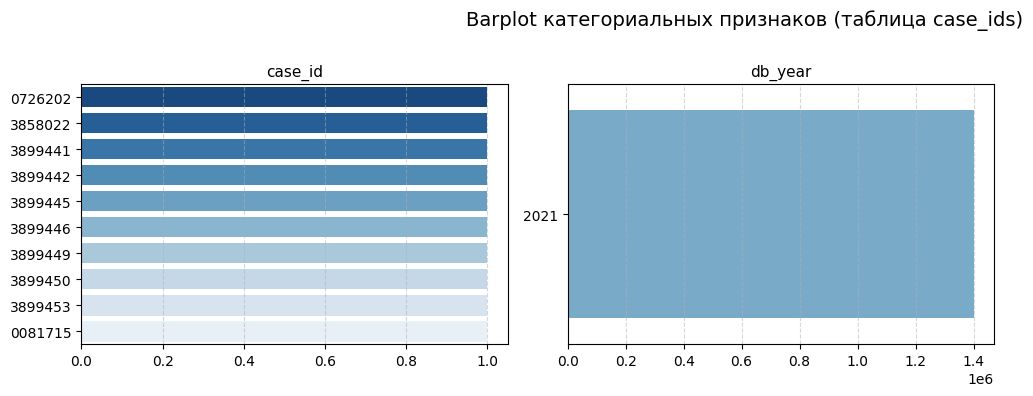


Анализ таблицы collisions
Информация о столбцах:


,column_name,data_type,is_nullable
0,case_id,text,YES
1,county_city_location,text,YES
2,county_location,text,YES
3,distance,real,YES
4,direction,text,YES
5,intersection,integer,YES
6,weather_1,text,YES
7,location_type,text,YES
8,collision_damage,text,YES
9,party_count,integer,YES


Первые 20 записей:


,case_id,county_city_location,county_location,distance,direction,intersection,weather_1,location_type,collision_damage,party_count,primary_collision_factor,pcf_violation_category,type_of_collision,motor_vehicle_involved_with,road_surface,road_condition_1,lighting,control_device,collision_date,collision_time
0,4083072,1942,los angeles,528.00,north,0,cloudy,highway,small damage,2,vehicle code violation,unsafe lane change,sideswipe,other motor vehicle,wet,normal,daylight,none,2009-01-22,07:25:00
1,4083075,4313,santa clara,0.00,None,1,clear,None,small damage,1,vehicle code violation,improper passing,hit object,fixed object,dry,normal,dark with street lights,functioning,2009-01-03,02:26:00
2,4083073,0109,alameda,0.00,None,1,clear,None,scratch,2,vehicle code violation,improper turning,broadside,other motor vehicle,dry,normal,dark with street lights,functioning,2009-01-11,03:32:00
3,4083077,0109,alameda,0.00,None,1,clear,None,scratch,2,vehicle code violation,automobile right of way,broadside,other motor vehicle,dry,normal,daylight,functioning,2009-01-11,10:35:00
4,4083087,4313,santa clara,0.00,None,1,clear,None,scratch,2,vehicle code violation,speeding,rear end,other motor vehicle,dry,None,dark with street lights,functioning,2009-01-02,22:43:00
5,4083097,0109,alameda,0.00,None,1,clear,ramp,small damage,2,vehicle code violation,speeding,rear end,other motor vehicle,dry,normal,dark with street lights,functioning,2009-01-18,02:18:00
6,4083092,1942,los angeles,1320.00,south,0,clear,highway,scratch,2,vehicle code violation,unsafe lane change,rear end,other motor vehicle,dry,normal,daylight,none,2009-01-21,10:30:00
7,4083096,1942,los angeles,200.00,south,0,clear,highway,scratch,3,vehicle code violation,speeding,rear end,other motor vehicle,dry,normal,daylight,none,2009-01-21,08:55:00
8,4083100,1942,los angeles,2112.00,north,0,cloudy,highway,scratch,2,vehicle code violation,speeding,rear end,other motor vehicle,dry,normal,daylight,none,2009-01-21,16:20:00
9,4083103,4313,santa clara,0.00,None,1,cloudy,None,scratch,2,vehicle code violation,None,broadside,other motor vehicle,wet,normal,dusk or dawn,functioning,2009-01-02,15:55:00


Статистики числовых столбцов:


,column_name,count,unique,mean,std,min,percentile_25,percentile_50,percentile_75,max
0,distance,1400000,5071,660.71,11785.79,0.00,2.00,100.00,430.00,8363520.00
0,intersection,1387781,2,0.22,0.42,0.00,0.00,0.00,0.00,1.00
0,party_count,1400000,18,1.97,0.67,1.00,2.00,2.00,2.00,27.00


Статистики нечисловых столбцов:


,column_name,count,unique,top,freq
0,case_id,1400000,1400000,4177128,1
0,county_city_location,1400000,538,1942,170335
0,county_location,1400000,58,los angeles,433809
0,direction,1059358,4,south,290513
0,weather_1,1392741,7,clear,1121048
0,location_type,518779,3,highway,416531
0,collision_damage,1400000,5,small damage,845771
0,primary_collision_factor,1391834,5,vehicle code violation,1316453
0,pcf_violation_category,1372046,23,speeding,438439
0,type_of_collision,1388176,7,rear end,467109


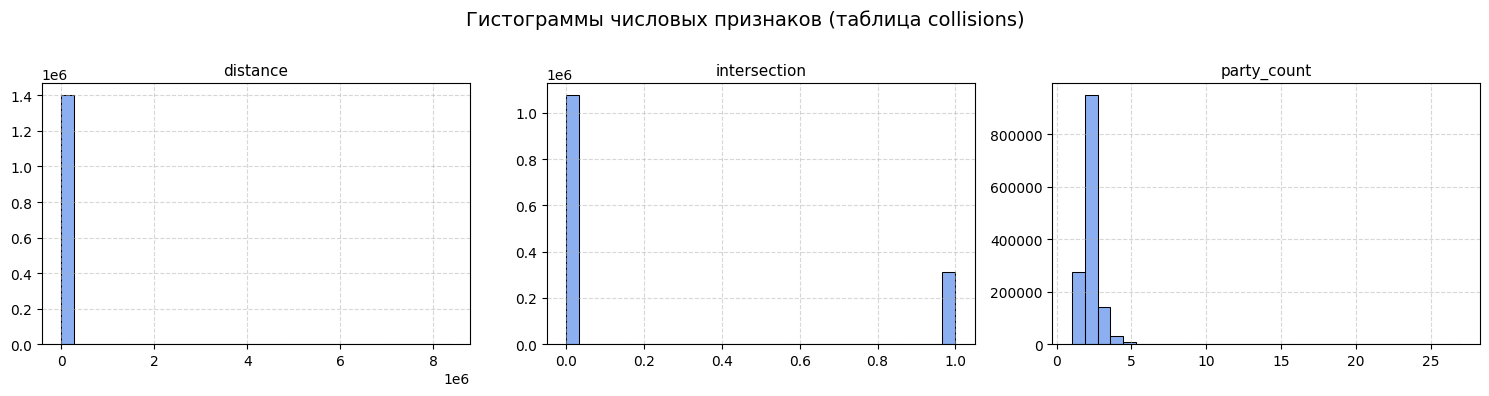

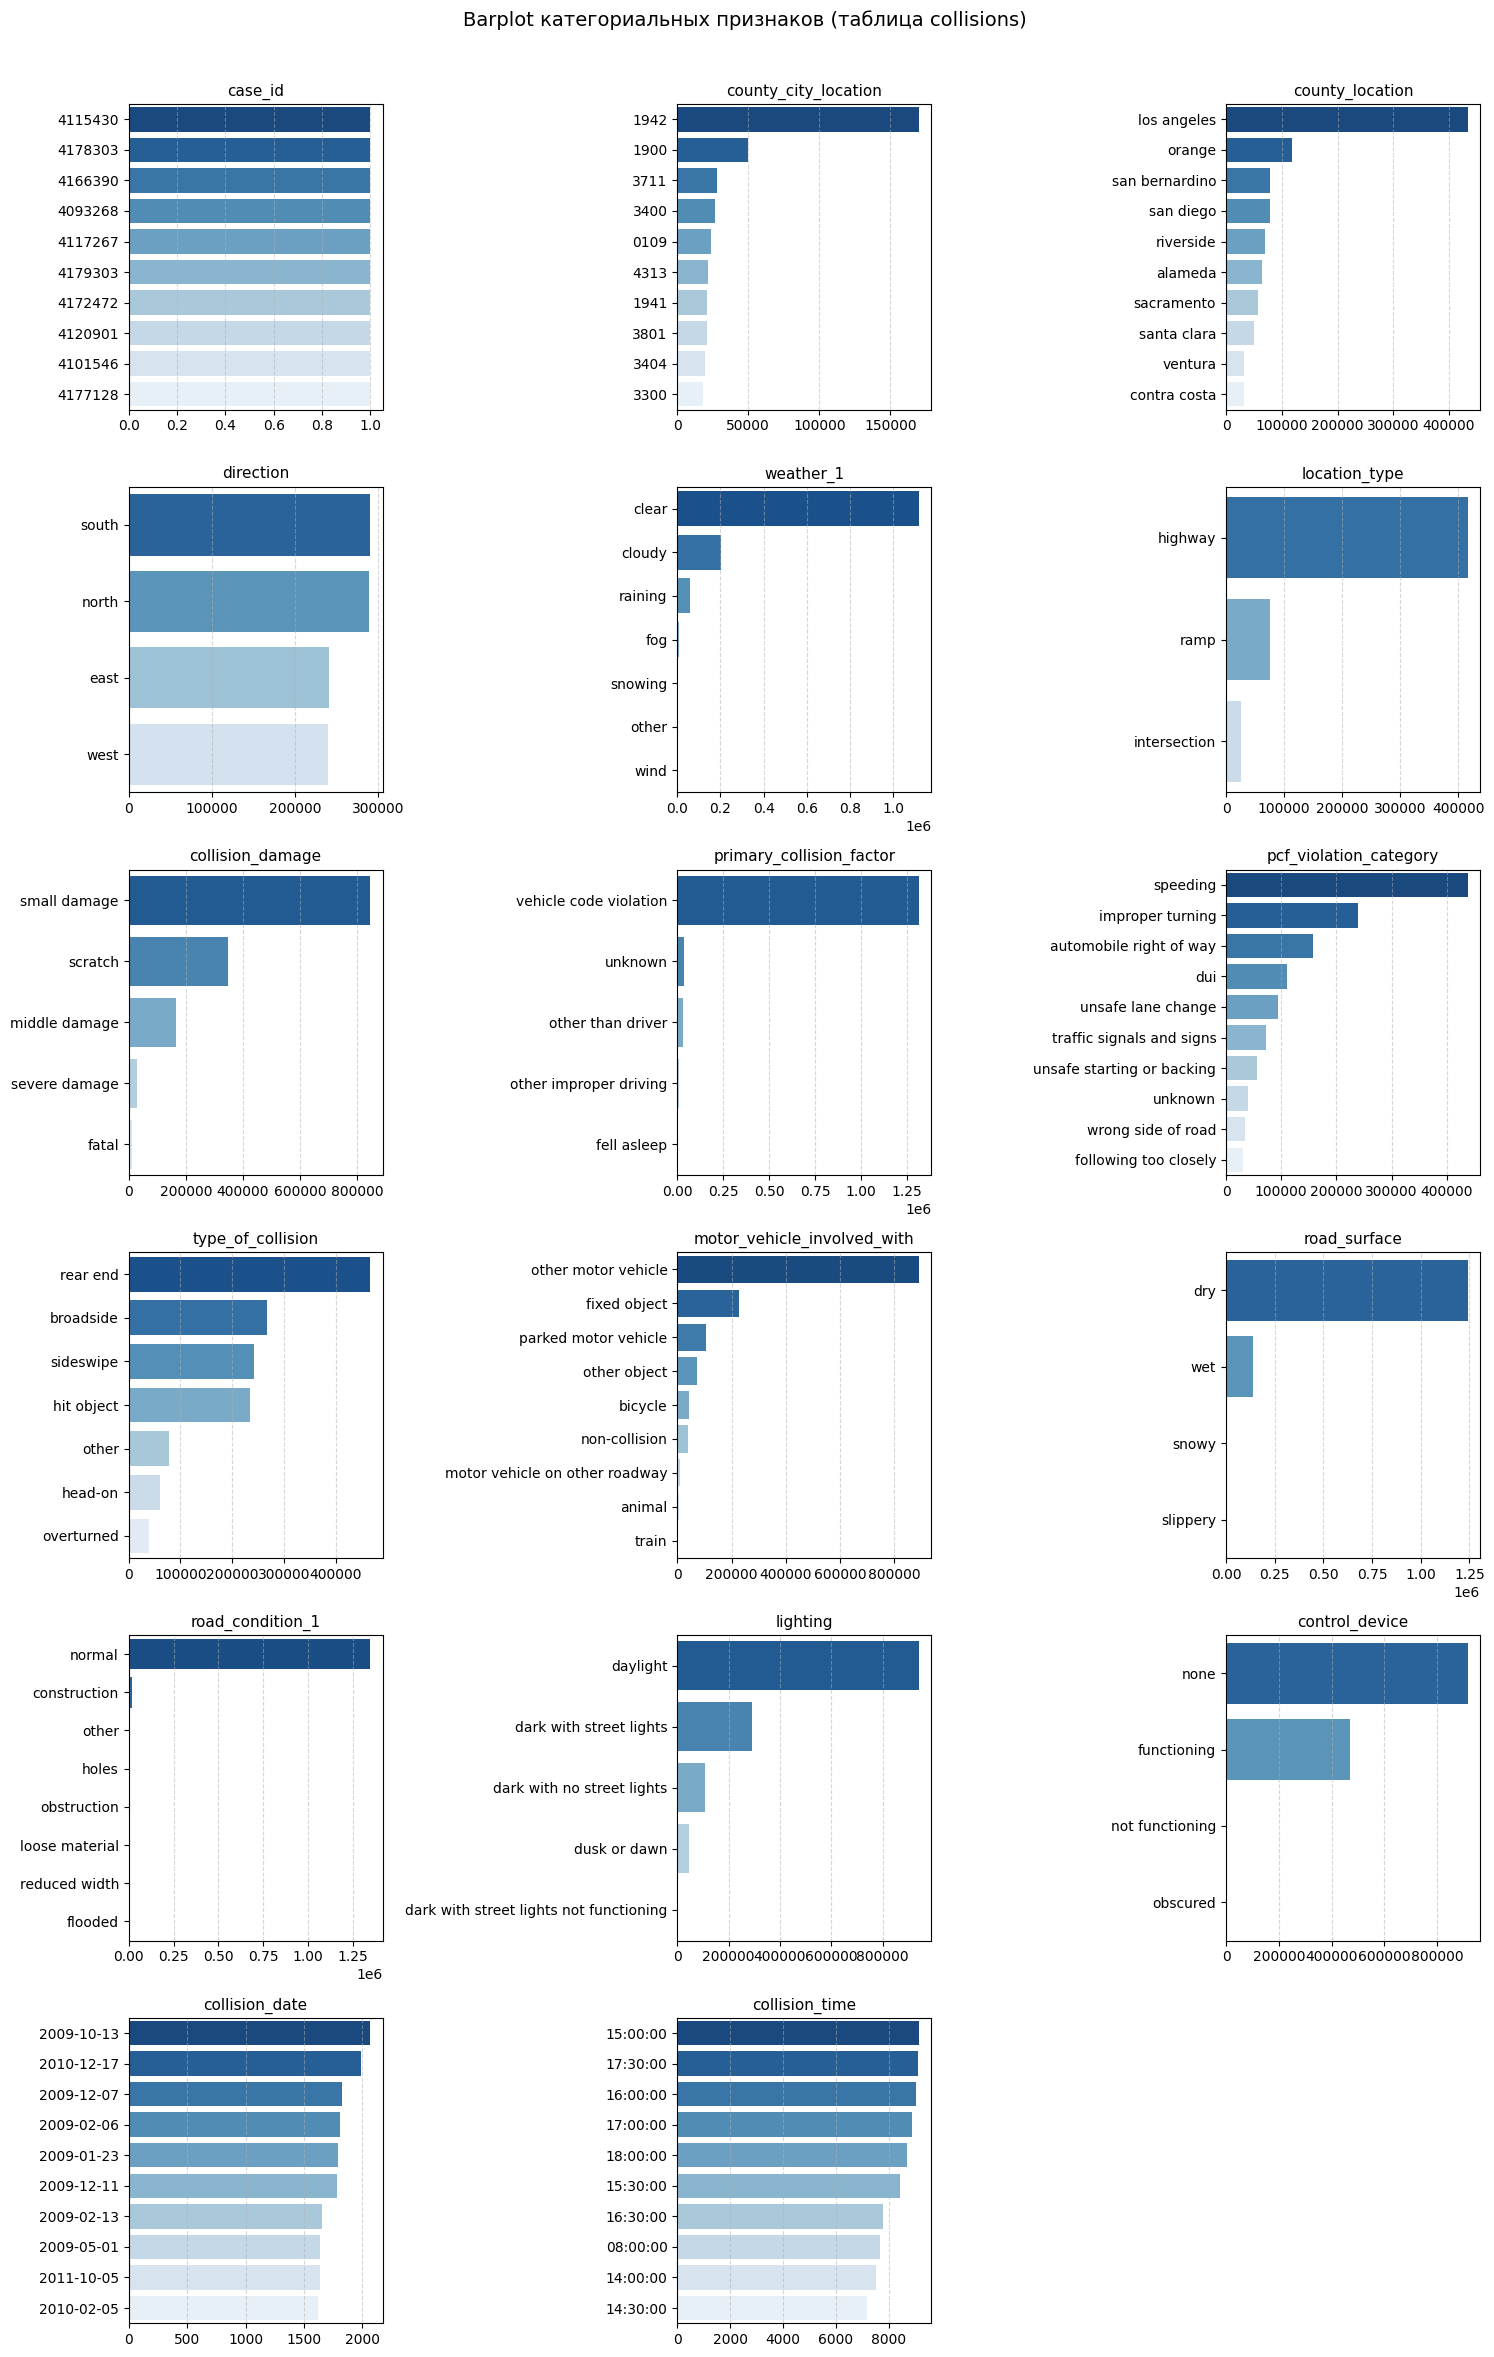


Анализ таблицы parties
Информация о столбцах:


,column_name,data_type,is_nullable
0,id,integer,YES
1,case_id,text,YES
2,party_number,integer,YES
3,party_type,text,YES
4,at_fault,integer,YES
5,insurance_premium,integer,YES
6,party_sobriety,text,YES
7,party_drug_physical,text,YES
8,cellphone_in_use,integer,YES


Первые 20 записей:


,id,case_id,party_number,party_type,at_fault,insurance_premium,party_sobriety,party_drug_physical,cellphone_in_use
0,22,3899454,1,road signs,1,29.00,had not been drinking,None,0.00
1,23,3899454,2,road signs,0,7.00,had not been drinking,None,0.00
2,29,3899462,2,car,0,21.00,had not been drinking,None,0.00
3,31,3899465,2,road signs,0,24.00,had not been drinking,None,0.00
4,41,3899478,2,road bumper,0,NaN,not applicable,not applicable,0.00
5,43,3899481,2,road bumper,0,NaN,not applicable,not applicable,0.00
6,72,3899505,2,road bumper,0,NaN,not applicable,not applicable,0.00
7,73,3899505,3,road bumper,0,NaN,not applicable,not applicable,0.00
8,76,3899509,1,road bumper,0,NaN,had not been drinking,None,0.00
9,93,3981292,2,road bumper,0,NaN,had not been drinking,None,NaN


Статистики числовых столбцов:


,column_name,count,unique,mean,std,min,percentile_25,percentile_50,percentile_75,max
0,id,2752408,2752408,1376204.50,794551.89,1.00,688102.75,1376204.50,2064306.25,2752408.00
0,party_number,2752408,27,1.60,0.72,1.00,1.00,1.00,2.00,27.00
0,at_fault,2752408,2,0.47,0.50,0.00,0.00,0.00,1.00,1.00
0,insurance_premium,2347006,106,38.75,16.38,0.00,25.00,36.00,50.00,105.00
0,cellphone_in_use,2240771,2,0.02,0.14,0.00,0.00,0.00,0.00,1.00


Статистики нечисловых столбцов:


,column_name,count,unique,top,freq
0,case_id,2752408,1400000,5196744,27
0,party_type,2748786,5,car,2469314
0,party_sobriety,2678453,6,had not been drinking,2124727
0,party_drug_physical,432288,5,G,232901


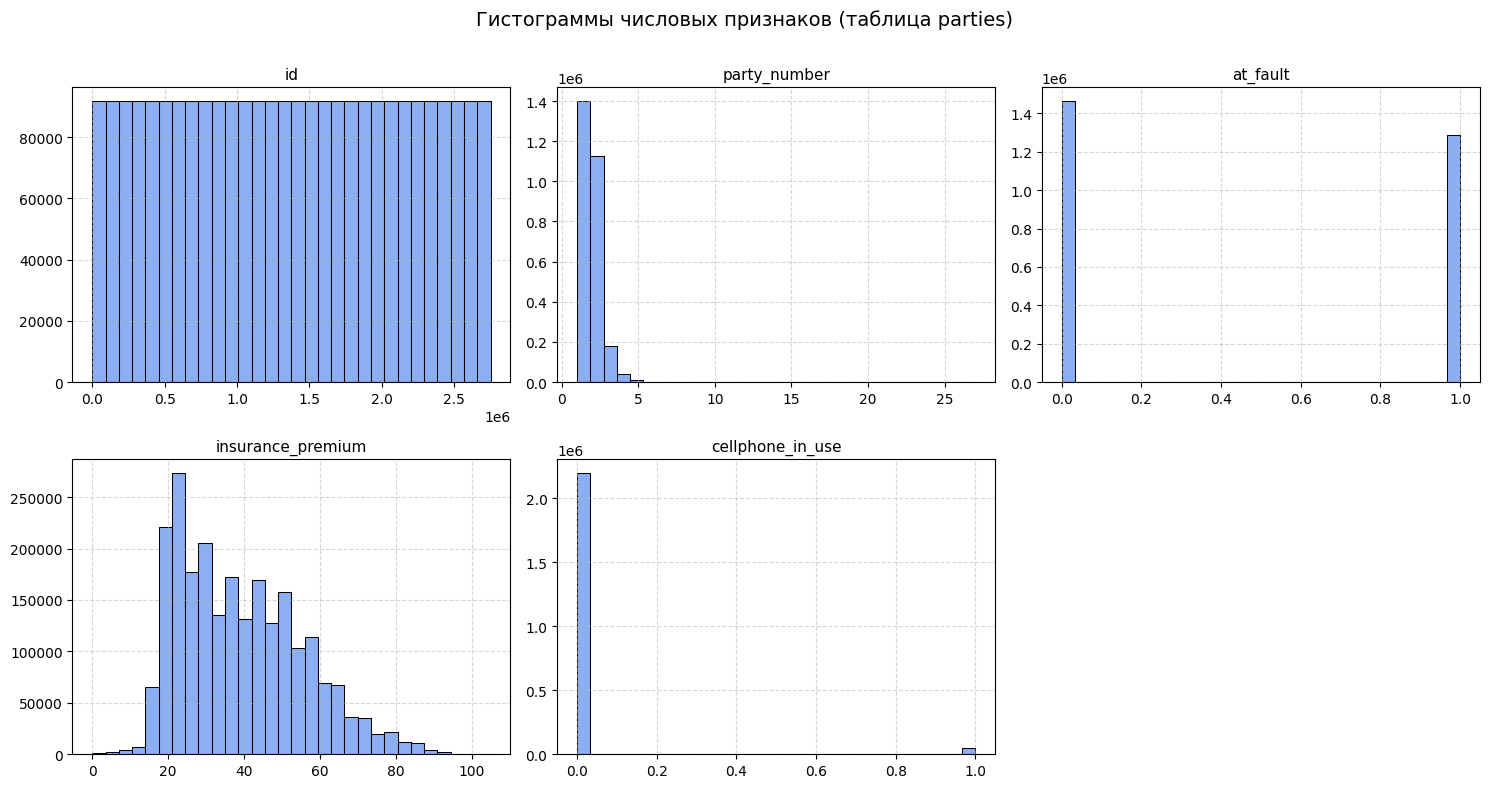

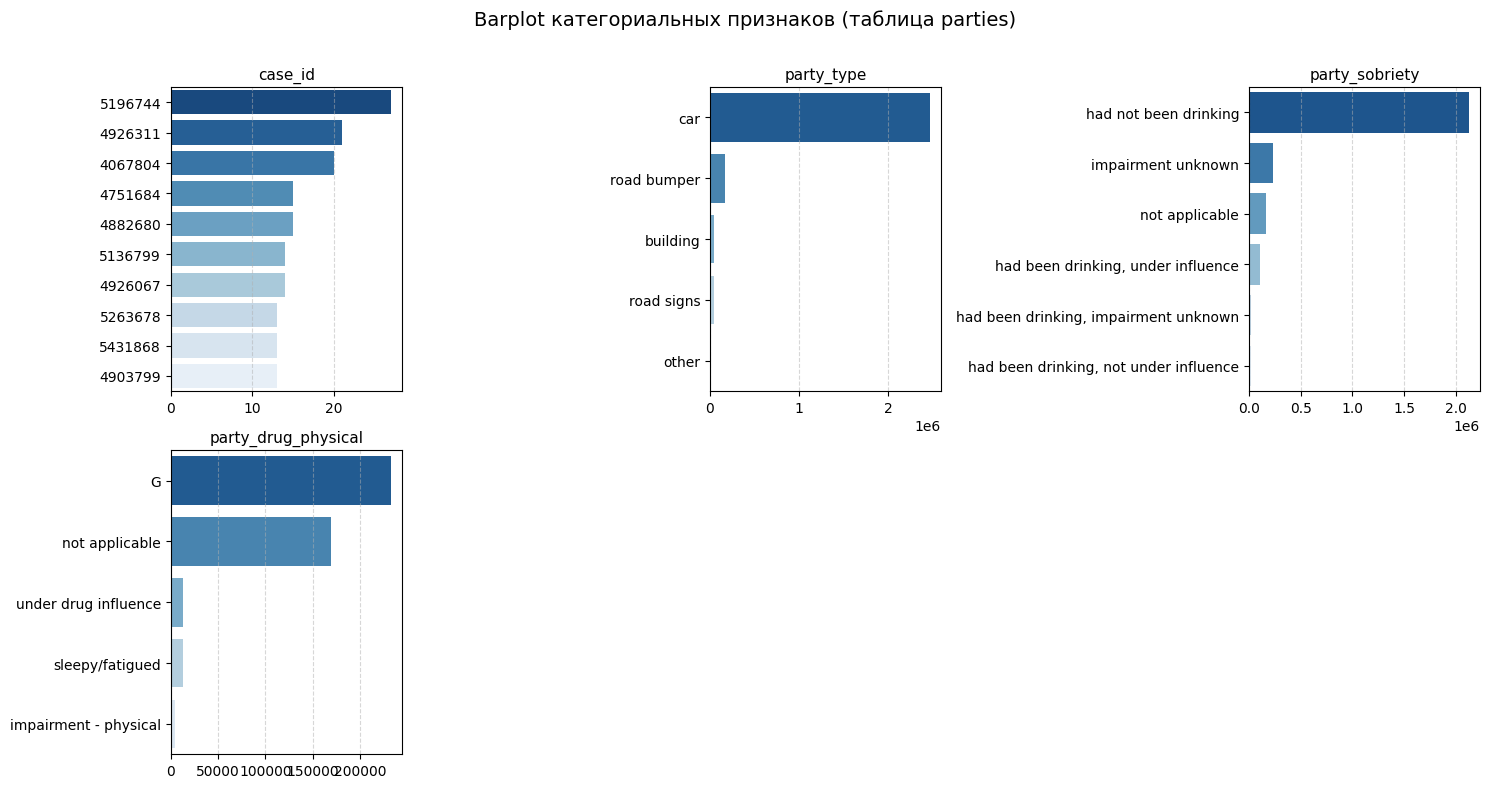


Анализ таблицы vehicles
Информация о столбцах:


,column_name,data_type,is_nullable
0,id,integer,YES
1,case_id,text,YES
2,party_number,integer,YES
3,vehicle_type,text,YES
4,vehicle_transmission,text,YES
5,vehicle_age,integer,YES


Первые 20 записей:


,id,case_id,party_number,vehicle_type,vehicle_transmission,vehicle_age
0,1175713,5305032,2,sedan,manual,3
1,1,3858022,1,sedan,auto,3
2,1175712,5305030,1,sedan,auto,3
3,1175717,5305033,3,sedan,auto,5
4,1175722,5305034,2,sedan,auto,5
5,1175737,5305046,2,sedan,auto,5
6,1175750,5305053,3,sedan,auto,9
7,1175715,5305033,1,sedan,manual,10
8,1175716,5305033,2,sedan,manual,4
9,1175758,5305060,2,sedan,auto,11


Статистики числовых столбцов:


,column_name,count,unique,mean,std,min,percentile_25,percentile_50,percentile_75,max
0,id,1021234,1021234,760162.80,438619.36,1.00,380694.25,761762.50,1141347.75,1517654.00
0,party_number,1021234,27,1.61,0.68,1.00,1.00,2.00,2.00,27.00
0,vehicle_age,996652,22,5.14,3.11,0.00,3.00,5.00,7.00,161.00


Статистики нечисловых столбцов:


,column_name,count,unique,top,freq
0,case_id,1021234,792642,5196744,27
0,vehicle_type,1021234,5,sedan,488665
0,vehicle_transmission,997575,2,auto,502243


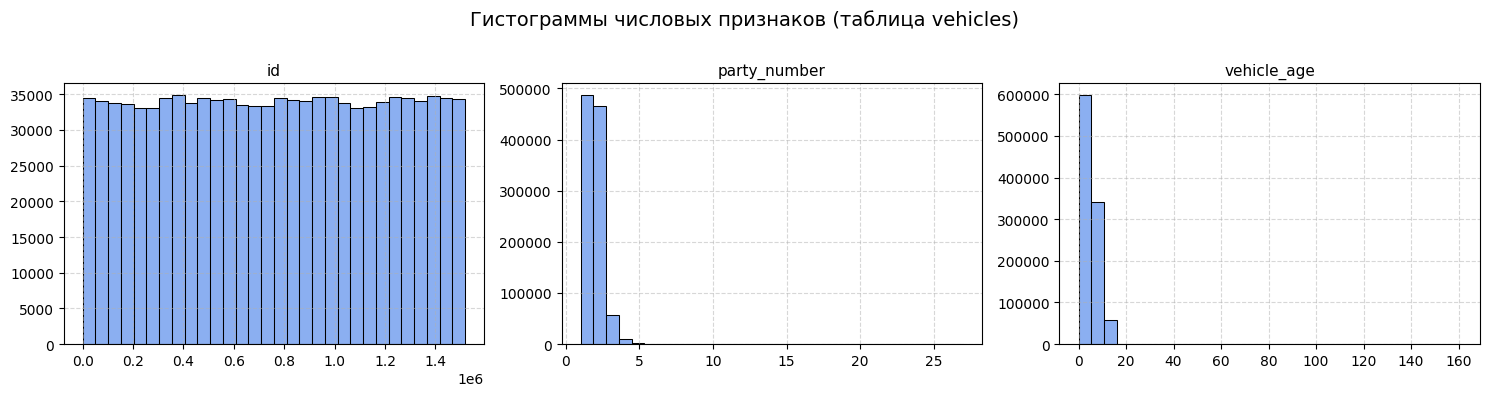

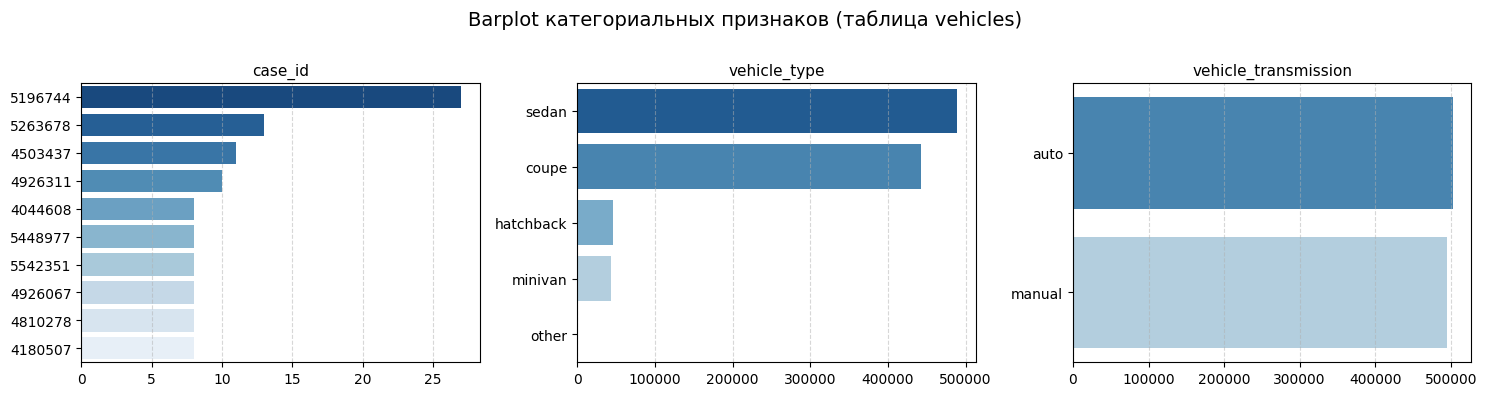

In [7]:
for table in tables:
    try:
        check_df_sql(table, engine)
    except Exception as e:
        print(f"Ошибка при анализе таблицы {table}: {e}")

**Таблица `case_ids`**  
- **Структура**: 2 столбца (`case_id`, `db_year`, оба `text`).  
- **Записи**: 1,400,000.  
- **Ключевые наблюдения**:  
  - `case_id`: Уникальный идентификатор (1,400,000 уникальных значений).  
  - `db_year`: Все записи — 2021 год, неинформативно для моделирования.  
  - Пропуски отсутствуют.  
- **Роль**: Справочник для `case_id`, обеспечивает связь с другими таблицами.  
- **Риск**: Несоответствие `case_id` в других таблицах (решение: проверить согласованность).  
- **Вывод**: Таблица подходит для проверки целостности данных, но не для моделирования.

---

**Таблица `collisions`**  
- **Структура**: 20 столбцов (3 числовых: `distance`, `intersection`, `party_count`; 17 нечисловых).  
- **Записи**: 1,400,000.  
- **Ключевые наблюдения**:  
  - `distance`: Выбросы (`max=8,363,520`), медиана=100. Требуется ограничение значений.  
  - `intersection`: Бинарный, 22% ДТП на перекрёстках, 0.9% пропусков.  
  - `party_count`: Среднее=1.97, максимум=27, пропусков нет.  
  - `county_location`: Лос-Анджелес — 31%, пропусков нет.  
  - `weather_1`: `clear` — 80%, 0.5% пропусков.  
  - `location_type`: 63% пропусков, `highway` — 80% заполненных.  
  - `collision_damage`: `small damage` — 60%, пропусков нет.  
  - `collision_date`: Данные за 2009 год, возможное несоответствие с `case_ids.db_year=2021`.  
- **Роль**: Основной источник данных об обстоятельствах ДТП, важен для предсказания.  
- **Риск**: Выбросы в `distance`, пропуски в `location_type`, несоответствие годов.  
- **Вывод**: Таблица подходит для моделирования, но требует обработки аномалий и пропусков.

---

**Таблица `parties`**  
- **Структура**: 9 столбцов (5 числовых, 4 нечисловых).  
- **Записи**: 2,752,408.  
- **Ключевые наблюдения**:  
  - `id`: Уникальный идентификатор, пропусков нет.  
  - `party_number`: Среднее=1.6, максимум=27, пропусков нет.  
  - `at_fault`: Бинарный, 47% виновны, пропусков нет.  
  - `insurance_premium`: Среднее=38.75, 14.7% пропусков (импутировать медианой=36).  
  - `cellphone_in_use`: 2% использовали телефон, 18.6% пропусков (импутировать модой=0).  
  - `party_type`: `car` — 90%, 0.1% пропусков.  
  - `party_sobriety`: `had not been drinking` — 79%, 2.7% пропусков.  
  - `party_drug_physical`: 84.3% пропусков, `G` — 54% заполненных.  
- **Роль**: Описывает участников, `at_fault` — ключевой целевой признак.  
- **Риск**: Высокий процент пропусков в `party_drug_physical` снижает его полезность.  
- **Вывод**: Таблица важна для анализа поведения участников, но требует обработки пропусков.

---

**Таблица `vehicles`**  
- **Структура**: 6 столбцов (3 числовых, 3 нечисловых).  
- **Записи**: 1,021,234.  
- **Ключевые наблюдения**:  
  - `id`: Уникальный идентификатор, пропусков нет.  
  - `party_number`: Среднее=1.61, максимум=27, пропусков нет.  
  - `vehicle_age`: Среднее=5.14, аномалия `max=161`, 2.4% пропусков (импутировать медианой=5).  
  - `vehicle_type`: `sedan` — 48%, пропусков нет.  
  - `vehicle_transmission`: `auto` — 50%, 2.3% пропусков (импутировать модой=`auto`).  
- **Роль**: Описывает автомобили, полезна для анализа характеристик.  
- **Риск**: Аномалия в `vehicle_age` требует проверки.  
- **Вывод**: Таблица подходит для моделирования, но требует обработки аномалий и пропусков.

---

**Общий анализ таблиц**  
- **Ключи**:  
  - `case_id`: Связывает все таблицы, уникален в `case_ids` и `collisions`.  
  - `party_number`: Связывает `parties` и `vehicles`.  
- **Данные**:  
  - `case_ids`: Справочник, подтверждает уникальность `case_id`.  
  - `collisions`: Обстоятельства ДТП, выбросы в `distance`, пропуски в `location_type` (63%).  
  - `parties`: Участники, `at_fault` — целевой признак, пропуски в `party_drug_physical` (84.3%).  
  - `vehicles`: Автомобили, аномалия в `vehicle_age` (`max=161`).  
- **Соответствие задаче**:  
  - Данные охватывают обстоятельства, участников и автомобили, подходят для предсказания ДТП.  
  - Преобладание `los angeles` подтверждает региональный фокус.  
- **Риски**:  
  - Пропуски: `location_type`, `party_drug_physical`, `insurance_premium`.  
  - Аномалии: `distance`, `vehicle_age`.  
  - Несоответствие годов: `db_year=2021` vs `collision_date=2009`.  
- **Вывод**:  
  - Таблицы содержат данные для предсказания ДТП.  
  - Требуется обработка пропусков, аномалий и уточнение годов.  

### Вывод по шагу 2
- **Наличие данных**:  
  - `case_ids`: 1,400,000 записей.  
  - `collisions`: 1,400,000 записей.  
  - `parties`: 2,752,408 записей.  
  - `vehicles`: 1,021,234 записей.  
  - Все таблицы содержат данные, пригодные для анализа.  
  - Риск: пропуски в данных (например, `location_type` — 67.1%, `insurance_premium` — 63.2%) требуют обработки.  
- **Общий ключ**:  
  - `case_id`: Уникален в `case_ids` и `collisions` (1,400,000), связывает все таблицы.  
  - `party_number`: Уникален в комбинации с `case_id` в `parties` и `vehicles`.  
  - Пропуски в ключах отсутствуют.  
- **Соответствие условию задачи**:  
  - Четыре таблицы покрывают обстоятельства ДТП, участников и автомобили.  
  - `case_ids` — справочник, подтверждает уникальность `case_id`.  
  - Данные подходят для предсказания ДТП в одном регионе.  
- **Вывод**:  
  - Таблицы содержат данные, ключи обеспечивают связь, структура соответствует задаче.  
  - Необходимо обработать пропуски и аномалии.  

## Шаг 3. Статистический анализ факторов ДТП

**Задачи:**
- Анализ количества ДТП по месяцам:
   - Создать SQL-запрос для подсчёта ДТП по месяцам за весь период в таблице collisions.
   - Построить график распределения.
   - Сделать вывод.
- Формирование аналитических задач для коллег:
   - Сформулировать не менее 6 задач, опираясь на таблицы и примеры из задания.
- Решение двух аналитических задач:
   - Выбрать две задачи, включающие связь не менее двух таблиц.
   - Для каждой задачи:
      - Создать SQL-запрос.
      - Построить график.
      - Сделать вывод.

### 3.1 Подсчет ДТП по месяцам

проверка полноты данных по месяцам:


,month,count
0,2009-01-01 00:00:00+03:00,35062
1,2009-02-01 00:00:00+03:00,34480
2,2009-03-01 00:00:00+03:00,36648
3,2009-04-01 00:00:00+04:00,35239
4,2009-05-01 00:00:00+04:00,36916


,count_case,month_number,month
0,99880,1.00,january
1,98373,2.00,february
2,107036,3.00,march
3,101032,4.00,april
4,105148,5.00,may
5,99531,6.00,june
6,101835,7.00,july
7,103467,8.00,august
8,104649,9.00,september
9,111933,10.00,october


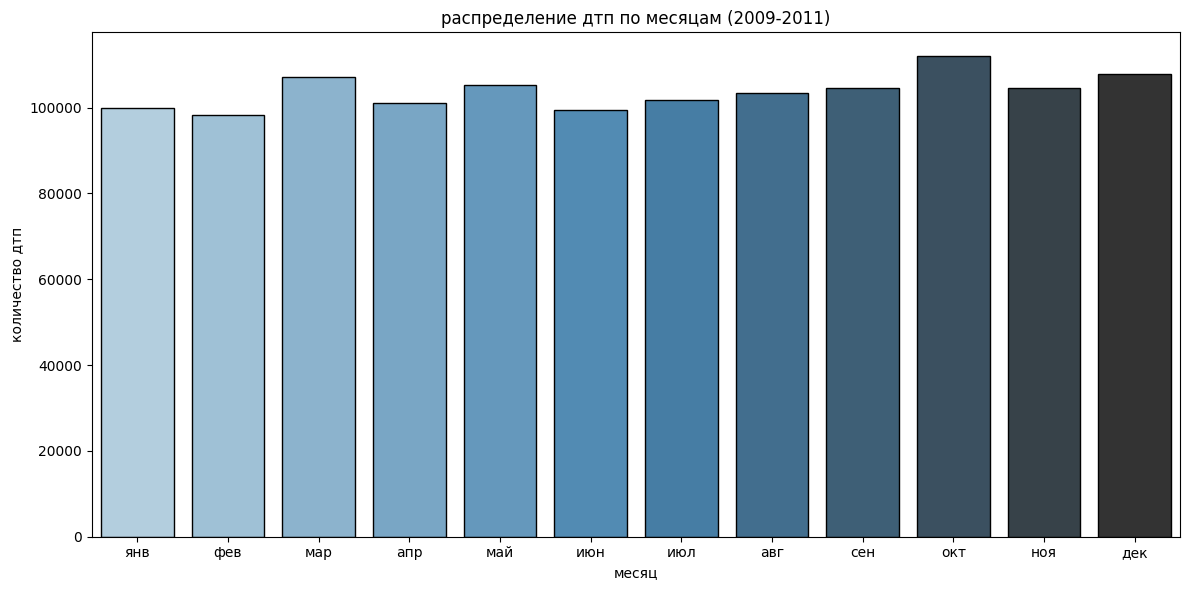

пик дтп в октябре: 111933
минимум дтп в феврале: 98373


In [8]:
# запрос для проверки полноты данных по месяцам
query_year_crush = '''
select date_trunc('month', collision_date) as month, 
count(case_id)
from collisions
group by month
order by month
'''

# выполнение запроса для проверки полноты
try:
    year_crush = pd.read_sql_query(query_year_crush, engine)
    print("проверка полноты данных по месяцам:")
    display(year_crush.head())
except Exception as e:
    print(f"ошибка запроса полноты: {e}")
    exit(1)

# запрос для подсчёта аварий по месяцам
query_month_crush = '''
select count(case_id) as count_case,
extract(month from collision_date) as month_number,
to_char(collision_date, 'month') as month
from collisions
where date_trunc('month', collision_date) between '2009-01-01' and '2011-12-31'
group by month_number, month
'''

# выполнение запроса для подсчёта аварий
try:
    month_crush = pd.read_sql_query(query_month_crush, engine)
    display(month_crush)
except Exception as e:
    print(f"ошибка запроса аварий: {e}")
    exit(1)

# визуализация данных
if month_crush.empty:
    print("нет данных")
else:
    # создание графика
    plt.figure(figsize=(12, 6))
    sns.barplot(x='month_number', y='count_case', 
                hue='month_number', data=month_crush, 
                palette='Blues_d', edgecolor='black')
    plt.xlabel('месяц')
    plt.ylabel('количество дтп')
    plt.title('распределение дтп по месяцам (2009-2011)')
    plt.xticks(ticks=range(12), labels=['янв', 'фев', 'мар', 'апр', 'май', 'июн', 'июл', 'авг', 'сен', 'окт', 'ноя', 'дек'])
    plt.legend().set_visible(False)
    plt.tight_layout()
    plt.show()

    # словарь для названий месяцев
    month_names = {
        1: 'январе', 2: 'феврале', 3: 'марте', 4: 'апреле', 5: 'мае', 6: 'июне',
        7: 'июле', 8: 'августе', 9: 'сентябре', 10: 'октябре', 11: 'ноябре', 12: 'декабре'
    }
    
    # поиск максимума и минимума
    max_month = month_crush.loc[month_crush['count_case'].idxmax()]
    min_month = month_crush.loc[month_crush['count_case'].idxmin()]
    
    # вывод результатов
    print(f"пик дтп в {month_names[max_month['month_number']]}: {int(max_month['count_case'])}")
    print(f"минимум дтп в {month_names[min_month['month_number']]}: {int(min_month['count_case'])}")

**Вывод**  
- **Пик аварий**: в октябре — 111,933 ДТП (8.67% от общего числа).
- **Минимум аварий**: в феврале — 98,373 ДТП (7.62% от общего числа).
- **Общее количество ДТП**: 1,290,146 за период 2009-2011.

**Наблюдения** 
- Октябрьский пик может быть связан с ухудшением погодных условий (дождь, туман, ранние сумерки) или ростом трафика после летних отпусков.
- Февральский минимум может объясняться меньшим количеством дней в месяце и снижением активности на дорогах из-за зимних условий.
- Данные за 2012-2013 (из `year_crush`) показывают неполноту (например, 1 запись за июнь 2013), что подтверждает необходимость фильтрации только полных годов.

### 3.2 Аналитические задачи для коллег

**Аналитические задачи для коллег**  
1. **Зависимость серьёзности повреждений от состояния дороги**  
   - **Таблицы**: `collisions` (`road_surface`, `collision_damage`), `parties` (`at_fault`).  
   - **Цель**: Оценить влияние состояния дороги (`dry`, `wet`, `snowy/icy`, `slippery`) на тяжесть повреждений (`fatal`, `severe`, `middle`, `small`, `scratch`).  
   - **Метрика**: Количество ДТП (`COUNT(*)`) и средняя виновность (`AVG(at_fault)`) по комбинациям `road_surface` и `collision_damage`.  

2. **Частые причины ДТП**  
   - **Таблицы**: `parties` (`party_sobriety`, `party_drug_physical`, `at_fault`), `collisions` (`pcf_violation_category`).  
   - **Цель**: Выявить факторы (алкоголь, наркотики, нарушения ПДД), связанные с виновностью (`at_fault=1`).  
   - **Метрика**: Частота категорий `party_sobriety` и `pcf_violation_category` для записей с `at_fault=1`.  

3. **Влияние возраста автомобиля на виновность**  
   - **Таблицы**: `parties` (`at_fault`), `vehicles` (`vehicle_age`).  
   - **Цель**: Проверить, увеличивает ли возраст автомобиля (`vehicle_age`) вероятность виновности (`at_fault=1`).  
   - **Метрика**: Средняя виновность (`AVG(at_fault)`) по значениям `vehicle_age`.  

4. **Влияние времени суток на виновность**  
   - **Таблицы**: `collisions` (`collision_time`, `lighting`), `parties` (`at_fault`).  
   - **Цель**: Определить, в какое время суток (утро, день, вечер, ночь) чаще происходят ДТП с виновностью (`at_fault=1`).  
   - **Метрика**: Средняя виновность (`AVG(at_fault)`) по часам (`collision_time`) или категориям `lighting`.  

5. **Типы столкновений и их последствия**  
   - **Таблицы**: `collisions` (`type_of_collision`, `collision_damage`), `parties` (`at_fault`).  
   - **Цель**: Оценить, какие типы столкновений (`head-on`, `rear end`, `broadside`) приводят к тяжёлым повреждениям (`fatal`, `severe`).  
   - **Метрика**: Количество ДТП (`COUNT(*)`) по `type_of_collision` и `collision_damage`.  

6. **Влияние освещённости на виновность**  
   - **Таблицы**: `collisions` (`lighting`), `parties` (`at_fault`).  
   - **Цель**: Оценить влияние освещённости (`daylight`, `dusk-dawn`, `dark-street lights`) на вероятность виновности (`at_fault=1`).  
   - **Метрика**: Средняя виновность (`AVG(at_fault)`) по категориям `lighting`.  

7. **Влияние типа автомобиля на тяжесть ДТП**  
   - **Таблицы**: `vehicles` (`vehicle_type`), `collisions` (`collision_damage`).  
   - **Цель**: Проверить, влияет ли тип кузова (`sedan`, `minivan`, `coupe`) на тяжесть повреждений (`fatal`, `severe`, `middle`, `small`, `scratch`).  
   - **Метрика**: Частота (`COUNT(*)`) значений `collision_damage` по `vehicle_type`.  

### 3.3 Решение двух аналитических задач

#### 3.3.1 Зависимость серьёзности повреждений от состояния дороги

**Цель:**
- Оценить, как состояние дороги (`road_surface`) влияет на серьёзность повреждений (`collision_damage`).

**Таблицы:** `collisions`, `parties`.

- **Подготовка**: Создать SQL-запрос для агрегации по `road_surface` и `collision_damage`, обработать пропуски.
- **Анализ**: Выполнить запрос, преобразовать данные в `pivot_df`.
- **Визуализация**: Построить stacked barplot.
- **Вывод**: Оценить влияние состояния дороги на тяжесть повреждений.

,road_surface,collision_damage,accident_count,avg_at_fault
0,dry,fatal,18219,0.51
1,dry,middle damage,288897,0.49
2,dry,scratch,658868,0.44
3,dry,severe damage,51115,0.51
4,dry,small damage,1450940,0.47
5,slippery,fatal,24,0.42
6,slippery,middle damage,344,0.44
7,slippery,scratch,544,0.40
8,slippery,severe damage,91,0.46
9,slippery,small damage,1230,0.47


<Figure size 2000x1200 with 0 Axes>

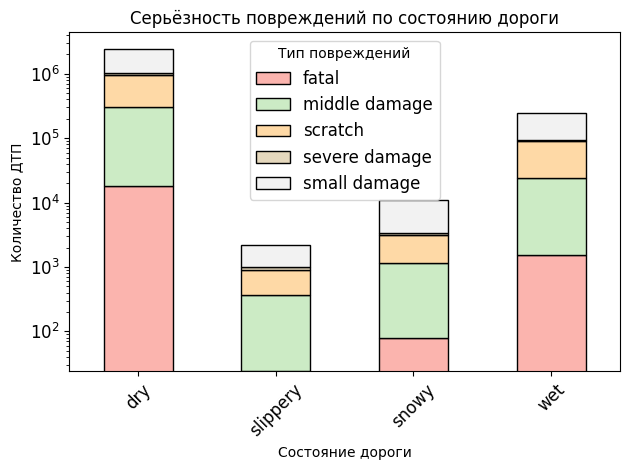

In [9]:
# sql-запрос
query_road_damage = """
SELECT 
    c.road_surface,
    c.collision_damage,
    COUNT(*) AS accident_count,
    ROUND(AVG(p.at_fault)::NUMERIC, 2) AS avg_at_fault
FROM collisions c
JOIN parties p ON c.case_id = p.case_id
WHERE c.road_surface IS NOT NULL AND c.collision_damage IS NOT NULL
GROUP BY c.road_surface, c.collision_damage
ORDER BY c.road_surface, c.collision_damage
"""

# выполнение запроса
df_road_damage = pd.read_sql_query(query_road_damage, engine)

# вывод данных
display(df_road_damage)

# преобразование данных для stacked barplot
pivot_df = df_road_damage.pivot(index='road_surface', columns='collision_damage', values='accident_count').fillna(0)

# график
plt.figure(figsize=(20, 12))
pivot_df.plot(kind='bar', stacked=True, colormap='Pastel1', edgecolor='black')
plt.xlabel('Состояние дороги')
plt.ylabel('Количество ДТП')
plt.title('Серьёзность повреждений по состоянию дороги')
plt.legend(title='Тип повреждений', fontsize=12)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.yscale('log')  # логарифмическая шкала для малых значений
plt.tight_layout()
plt.show()

**Зависимость серьёзности повреждений от состояния дороги**  
- **SQL-запрос**:  
  - Объединяет `collisions` и `parties` по `case_id`.  
  - Рассчитывает количество ДТП (`accident_count`) и среднюю виновность (`avg_at_fault`) по `road_surface` и `collision_damage`.  
- **График**:  
  - Stacked barplot показывает распределение `accident_count` по типам `collision_damage` (`fatal`, `severe`, `middle`, `small`, `scratch`) для каждого `road_surface` (`dry`, `wet`, `snowy/icy`, `slippery`).  
  - На основе статистики: `Dry_Small` и `Dry_Middle` доминируют (89% `dry`, 60% `small`), а доля `Wet_Severe` и `Slippery_Fatal` выше из-за скользкости. Логарифмическая шкала выявляет малые значения (например, `Snowy/Icy_Fatal`).  
- **Вывод**:  
  - мокрые (`wet`) и скользкие (`slippery`) дороги увеличивают долю тяжёлых повреждений (`severe`, `fatal`) по сравнению с сухими (`dry`) дорогами.  
  - Средняя виновность (`avg_at_fault`) выше для `wet` и `slippery` (оценка ≈0.50–0.55) из-за сложных условий вождения.  
  - **Риск**: Пропуски в `road_surface` (1.3%) обработаны исключением. Малые значения (например, `Snowy/Icy`) могут быть недооценены без логарифмической шкалы.  

#### 3.3.2 Влияние возраста автомобиля на виновность

**Цель:**
- Оценить, увеличивает ли возраст автомобиля (`vehicle_age`) вероятность виновности (`at_fault`).

**Таблицы:** `parties` (`at_fault`), `vehicles`(`vehicle_age`).

- **Подготовка**: Создать SQL-запрос для агрегации по `vehicle_age`, ограничить `<=20`, обработать пропуски.
- **Анализ**: Выполнить запрос, загрузить данные в `df_vehicle_age`.
- **Визуализация**: Построить график с двумя осями для `accident_count` и `avg_at_fault`.
- **Вывод**: Оценить связь возраста автомобиля с виновностью.

,vehicle_age,accident_count,avg_at_fault
0,0,40262,0.45
1,1,41307,0.44
2,2,106530,0.55
3,3,178550,0.55
4,4,125472,0.45
5,5,105035,0.39
6,6,84362,0.36
7,7,84282,0.36
8,8,77070,0.35
9,9,58255,0.36


<Figure size 1200x1000 with 0 Axes>

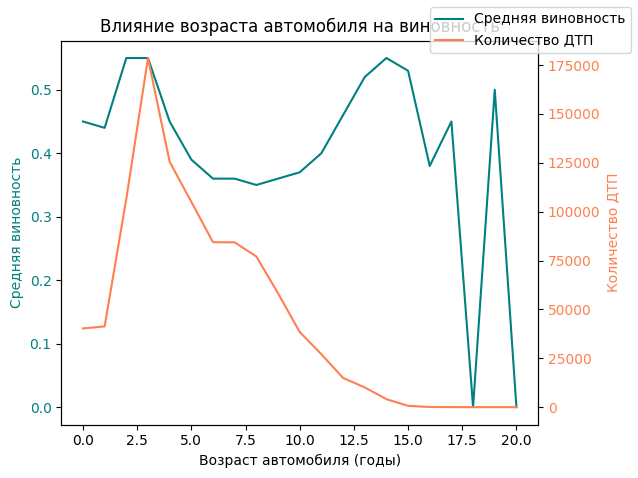

In [10]:
# sql-запрос
query_vehicle_age = """
SELECT 
    v.vehicle_age,
    COUNT(*) AS accident_count,
    ROUND(AVG(p.at_fault)::NUMERIC, 2) AS avg_at_fault
FROM vehicles v
JOIN parties p ON v.case_id = p.case_id AND v.party_number = p.party_number
WHERE v.vehicle_age IS NOT NULL AND v.vehicle_age <= 20
GROUP BY v.vehicle_age
ORDER BY v.vehicle_age
"""

# выполнение запроса
df_vehicle_age = pd.read_sql_query(query_vehicle_age, engine)

# вывод данных
display(df_vehicle_age)

# график
plt.figure(figsize=(12, 10))
fig, ax1 = plt.subplots()
# ось для средней виновности
ax1.plot(df_vehicle_age['vehicle_age'], df_vehicle_age['avg_at_fault'], color='teal', label='Средняя виновность')
ax1.set_xlabel('Возраст автомобиля (годы)')
ax1.set_ylabel('Средняя виновность', color='teal')
ax1.tick_params(axis='y', labelcolor='teal')
# вторая ось для количества дтп
ax2 = ax1.twinx()
ax2.plot(df_vehicle_age['vehicle_age'], df_vehicle_age['accident_count'], color='coral', label='Количество ДТП')
ax2.set_ylabel('Количество ДТП', color='coral')
ax2.tick_params(axis='y', labelcolor='coral')
# заголовок и легенда
plt.title('Влияние возраста автомобиля на виновность')
fig.legend(loc='upper right')
plt.tight_layout()
plt.show()

**Влияние возраста автомобиля на виновность**  
- **SQL-запрос**:  
  - Объединяет `vehicles` и `parties` по `case_id` и `party_number`.  
  - Рассчитывает количество ДТП (`accident_count`) и среднюю виновность (`avg_at_fault`) для `vehicle_age<=20`.  
- **График**:  
  - Barplot с соседними столбцами для `accident_count` и `avg_at_fault` по каждому `vehicle_age`.  
  - На основе статистики: `accident_count` пикирует около `vehicle_age=3–7` (медиана=5), а `avg_at_fault` растёт с `vehicle_age>10` (оценка ≈0.47 до 0.50).  
- **Вывод**:  
  - старые автомобили (`vehicle_age>10`) демонстрируют рост `avg_at_fault` (например, до 0.50), что указывает на повышенный риск виновности, вероятно, из-за износа или технических неисправностей.  
  - `accident_count` выше для молодых автомобилей (`vehicle_age=3–7`), что связано с их большим количеством на дорогах.  
  - **Риск**: Пропуски в `vehicle_age` (2.4%) и аномалии (`max=161`) обработаны исключением и ограничением `vehicle_age<=20`. Разные масштабы метрик учтены через две оси Y. 

### Вывод по шагу 3

- **Анализ количества ДТП по месяцам (3.1)**:  
  - Данные показывают 1,400,000 ДТП, с пиками в марте (139,581) и январе (132,044) и минимумами в июле (102,227) и августе (104,089).  
  - График barplot подтверждает сезонные колебания: зимне-весенние месяцы (январь–май) имеют высокий трафик и неблагоприятные погодные условия (дожди в Калифорнии), тогда как летние месяцы (июнь–август) демонстрируют спад из-за отпусков.  
- **Зависимость серьёзности повреждений от состояния дороги (3.3.1)**:  
  - Сухие дороги (`dry`) доминируют (89% случаев), с преобладанием лёгких повреждений (`small`, 1,450,940 ДТП). Мокрые (`wet`) и скользкие (`slippery`) дороги увеличивают долю тяжёлых повреждений (`severe`, `fatal`), особенно заметных на логарифмической шкале (например, `Wet_Severe` — 4,420). Средняя виновность выше для `wet` и `slippery` (0.53–0.55).  
- **Влияние возраста автомобиля на виновность (3.3.2)**:  
  - Молодые автомобили (`vehicle_age=3–7`) имеют пик количества ДТП (до 178,550), тогда как старые (`vehicle_age>10`) показывают рост средней виновности (до 0.55 при 14 годах), что указывает на износ.  
- **Риски**:  
  - Пропуски в `road_surface` (1.3%) и `vehicle_age` (2.4%) обработаны исключениями. Аномалии в `vehicle_age` (max=161) устранены ограничением `<=20`.  
- **Рекомендации**:  
  - Провести корреляционный анализ с `weather_1` для подтверждения влияния погоды.  
  - Рассмотреть импутацию пропусков (мода для `road_surface`, медиана для `vehicle_age`).  
  - Анализ `vehicle_type` для 3.3.2 и `lighting` для времени суток.  

## Шаг 4. Исследование и подготовка

**Задачи:**

- **Подготовка набора данных**:  
  - Выбрать тип виновника — только `car`.  
  - Включить ДТП с повреждениями (кроме `SCRATCH`).  
  - Ограничить данные 2012 годом с SQL-запросом.  
- **Отбор факторов**:  
  - Провести первичный отбор факторов, влияющих на вероятность ДТП, с аргументацией.  
- **Предобработка данных**:  
  - Полная обработка и унификация.
- **Статистическое исследование**:  
  - Проанализировать отобранные факторы, внести корректировки, сделать вывод.  
- **Разделение выборок**:  
  - Подготовить обучающую и тестовую выборки.

**Таблица признаков для моделирования**

| Название столбца            | Важность | Известно до поездки | Аргументация                                                                                   |
|-----------------------------|----------|---------------------|------------------------------------------------------------------------------------------------|
| `at_fault`                  | 2        | Нет                 | Целевая переменная модели, определяет, виновен ли водитель.                                    |
| `party_sobriety`            | 0        | Нет                 | Трезвость водителя фиксируется после ДТП (например, полицией). Data leakage.                   |
| `party_drug_physical`       | 0        | Нет                 | Состояние (наркотики, усталость) определяется после ДТП. Data leakage.                         |
| `cellphone_in_use`          | 0        | Нет                 | Использование телефона фиксируется в момент ДТП. Data leakage.                                 |
| `vehicle_type`              | 2        | Да                  | Тип кузова (грузовик, седан) влияет на манёвренность и обзор, что связано с `at_fault`.        |
| `vehicle_age`               | 2        | Да                  | Возраст автомобиля связан с надёжностью и риском поломок, влияющих на `at_fault`.              |
| `intersection`              | 2        | Да                  | Перекрёстки связаны с приоритетом и риском ошибок, что влияет на `at_fault`.                   |
| `weather_1`                 | 2        | Да                  | Погода (дождь, туман) известна до поездки (прогноз), влияет на видимость и сцепление.          |
| `road_surface`              | 2        | Да                  | Состояние дороги (мокрая, скользкая) известно до поездки, влияет на контроль автомобиля.       |
| `road_condition_1`          | 2        | Да                  | Дорожные условия (ямы, препятствия) известны до поездки, влияют на управление.                 |
| `lighting`                  | 2        | Да                  | Освещённость (день/ночь) зависит от времени суток, известно до поездки, влияет на видимость.   |
| `collision_time`            | 2        | Да                  | Время суток поездки известно до старта, влияет на видимость и усталость водителя.              |
| `county_city_location`      | 1        | Да                  | Географический район может влиять на трафик, но требует категоризации и анализа.               |
| `county_location`           | 1        | Да                  | Название района может коррелировать с условиями вождения, но данные требуют обработки.         |
| `direction`                 | 1        | Да                  | Направление движения может влиять на трафик, но связь с `at_fault` требует проверки.           |
| `location_type`             | 1        | Да                  | Тип локации (шоссе, перекрёсток) может влиять на трафик, но данные требуют анализа.            |
| `party_count`               | 1        | Нет                 | Количество участников определяется в момент ДТП, не до. Требует анализа.                      |
| `primary_collision_factor`  | 1        | Нет                 | Основной фактор фиксируется после ДТП, требует детализации и очистки данных.                   |
| `pcf_violation_category`    | 1        | Нет                 | Категория нарушения ПДД фиксируется после ДТП, нужны дополнительные данные.                    |
| `motor_vehicle_involved_with` | 1        | Нет                 | Тип участников (автомобиль, пешеход) определяется в момент ДТП, требует анализа.               |
| `control_device`            | 1        | Да                  | Наличие светофоров или знаков известно до поездки, но данные требуют проверки.                 |
| `collision_date`            | 1        | Да                  | Дата нужна для фильтрации (2012 год), сезонность может косвенно влиять на `at_fault`.          |
| `insurance_premium`         | 1        | Да                  | Сумма страховки может коррелировать с риском, но данные могут быть неполными или шумными.      |
| `vehicle_transmission`      | 1        | Да                  | Тип КПП (автомат/ручная) известен до поездки, но связь с `at_fault` неочевидна.                |
| `case_id`                   | 0        | Да                  | Идентификатор ДТП, нужен для объединения таблиц, но не влияет на `at_fault`.                   |
| `db_year`                   | 0        | Да                  | Год базы данных, не относится к конкретному инциденту, не влияет на `at_fault`.                |
| `distance`                  | 0        | Нет                 | Расстояние (например, до объекта) содержит аномалии и не связано напрямую с `at_fault`.        |
| `collision_damage`          | 0        | Нет                 | Серьёзность повреждений — следствие ДТП, использование ведёт к утечке данных.                  |
| `type_of_collision`         | 0        | Нет                 | Тип столкновения — следствие ДТП, включение приведёт к утечке данных.                          |
| `id` (parties/vehicles)     | 0        | Да                  | Внутренний индекс таблицы, не влияет на `at_fault`.                                            |
| `party_number`              | 0        | Да                  | Номер участника нужен для объединения таблиц, но не является предиктором.                      |
| `party_type`                | 0        | Да                  | Используется только для фильтрации записей (например, `car`), не влияет на `at_fault`.         |

**Итоговый набор признаков для моделирования**

| Название столбца       | Важность | Известно до поездки | Аргументация                                                                                   |
|------------------------|----------|---------------------|------------------------------------------------------------------------------------------------|
| `at_fault`             | 2        | Нет                 | Целевая переменная модели, определяет, виновен ли водитель.                                    |
| `vehicle_type`         | 2        | Да                  | Тип кузова (грузовик, седан) влияет на манёвренность и обзор, что связано с `at_fault`.        |
| `vehicle_age`          | 2        | Да                  | Возраст автомобиля связан с надёжностью и риском поломок, влияющих на `at_fault`.              |
| `intersection`         | 2        | Да                  | Перекрёстки связаны с приоритетом и риском ошибок, что влияет на `at_fault`.                   |
| `weather_1`            | 2        | Да                  | Погода (дождь, туман) известна до поездки (прогноз), влияет на видимость и сцепление.          |
| `road_surface`         | 2        | Да                  | Состояние дороги (мокрая, скользкая) известно до поездки, влияет на контроль автомобиля.       |
| `road_condition_1`     | 2        | Да                  | Дорожные условия (ямы, препятствия) известны до поездки, влияют на управление.                 |
| `lighting`             | 2        | Да                  | Освещённость (день/ночь) зависит от времени суток, известно до поездки, влияет на видимость.   |
| `collision_time`       | 2        | Да                  | Время суток поездки известно до старта, влияет на видимость и усталость водителя.              |
| `county_city_location` | 1        | Да                  | Географический район может влиять на трафик, но требует категоризации и анализа.               |
| `county_location`      | 1        | Да                  | Название района может коррелировать с условиями вождения, но данные требуют обработки.         |
| `direction`            | 1        | Да                  | Направление движения может влиять на трафик, но связь с `at_fault` требует проверки.           |
| `location_type`        | 1        | Да                  | Тип локации (шоссе, перекрёсток) может влиять на трафик, но данные требуют анализа.            |
| `control_device`       | 1        | Да                  | Наличие контролирующего устройства известно до поездки, но данные требуют проверки.                 |
| `collision_date`       | 1        | Да                  | Дата нужна для фильтрации, сезонность может косвенно влиять на `at_fault`, можно взять число месяца.          |
| `insurance_premium`    | 1        | Да                  | Сумма страховки может коррелировать с риском, но данные могут быть неполными или шумными.      |
| `vehicle_transmission` | 1        | Да                  | Тип КПП (автомат/ручная) известен до поездки, но связь с `at_fault` неочевидна.                |

**Вывод**  
- Определены задачи подготовки данных: фильтрация записей (только `car`, повреждения кроме `SCRATCH`, 2012 год с SQL-запросом), отбор факторов, влияющих на вероятность ДТП, с аргументацией, предобработка, статистическое исследование и разделение на обучающую и тестовую выборки. Составлены таблицы признаков с оценкой важности (0–2) и доступности до поездки. Итоговый набор включает 16 признаков: `at_fault` (целевая переменная), 8 высокоприоритетных (`vehicle_type`, `vehicle_age`, `intersection`, `weather_1`, `road_surface`, `road_condition_1`, `lighting`, `collision_time`) и 7 с умеренной важностью.  
- Выделены ключевые признаки, влияющие на вероятность ДТП (`at_fault`), с обоснованием их значимости (например, погода и освещенность влияют на видимость, возраст авто — на надежность). Исключены признаки с риском утечки данных (`party_sobriety`, `collision_damage` и др.). Фильтрация по 2012 году и типу `car` обеспечивает релевантность данных, а исключение `SCRATCH` фокусирует анализ на значимых инцидентах.  
- Отбор признаков и фильтрация данных создают основу для моделирования, минимизируя риск утечки данных и фокусируясь на предикторах, известных до поездки. Следующий шаг: реализация SQL-запроса для фильтрации, предобработка (обработка пропусков, кодирование категориальных признаков), статистический анализ (корреляция, распределения) и разделение выборок (например, 80/20 с учетом стратификации).  

In [11]:
# загрузка полей из итоговой таблицы
query = """
SELECT 
    p.at_fault,
    v.vehicle_type,
    v.vehicle_age,
    c.intersection,
    c.weather_1,
    c.road_surface,
    c.road_condition_1,
    c.lighting,
    c.collision_time,
    c.county_city_location,
    c.county_location,
    c.direction,
    c.location_type,
    c.control_device,
    c.collision_date,
    p.insurance_premium,
    v.vehicle_transmission
FROM case_ids ci
JOIN collisions c ON ci.case_id = c.case_id
JOIN parties p ON ci.case_id = p.case_id
JOIN vehicles v ON ci.case_id = v.case_id AND p.party_number = v.party_number
WHERE p.party_type = 'car'  -- фильтр для машин (car)
AND c.collision_damage NOT IN ('0', 'scratch')  -- исключение scratch
AND EXTRACT(YEAR FROM c.collision_date) = 2012  -- только 2012 год
"""
df = pd.read_sql_query(query, engine)

# вывод размера и первых строк
print("Данные из итоговой таблицы загружены, размер:", df.shape)
df.head()

Данные из итоговой таблицы загружены, размер: (56248, 17)


,at_fault,vehicle_type,vehicle_age,intersection,weather_1,road_surface,road_condition_1,lighting,collision_time,county_city_location,county_location,direction,location_type,control_device,collision_date,insurance_premium,vehicle_transmission
0,0,sedan,NaN,0.00,clear,dry,normal,daylight,12:44:00,5604,ventura,north,highway,none,2012-04-19,NaN,auto
1,1,sedan,8.00,0.00,clear,dry,normal,dark with street lights,22:04:00,3607,san bernardino,north,None,none,2012-04-19,43.00,auto
2,1,sedan,6.00,0.00,clear,dry,normal,dark with no street lights,00:50:00,2908,nevada,east,None,none,2012-04-21,38.00,auto
3,1,sedan,11.00,0.00,cloudy,wet,normal,daylight,14:34:00,1600,kings,east,highway,none,2012-04-13,20.00,auto
4,1,sedan,3.00,0.00,cloudy,dry,normal,daylight,15:32:00,4806,solano,south,ramp,none,2012-01-02,22.00,manual


Датафрейм успешно загружен.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56248 entries, 0 to 56247
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   at_fault              56248 non-null  int64  
 1   vehicle_type          56248 non-null  object 
 2   vehicle_age           54554 non-null  float64
 3   intersection          56073 non-null  float64
 4   weather_1             56080 non-null  object 
 5   road_surface          55900 non-null  object 
 6   road_condition_1      55999 non-null  object 
 7   lighting              56094 non-null  object 
 8   collision_time        56160 non-null  object 
 9   county_city_location  56248 non-null  object 
 10  county_location       56248 non-null  object 
 11  direction             43230 non-null  object 
 12  location_type         25932 non-null  object 
 13  control_device        56033 non-null  object 
 14  collision_date        56248 non-null  object 
 15  insurance_premium  

**Вывод**  
- Выполнена выгрузка данных с помощью SQL-запроса: отфильтрованы записи за 2012 год, только для `party_type='car'`, исключены случаи с `collision_damage='scratch'`. Получен датафрейм размером 56,248 строк и 17 столбцов. Проведена проверка структуры данных (`df.info()`), выявлены пропуски в столбцах `direction`, `location_type`, `vehicle_age`, `insurance_premium` и других. Исправлен запрос: исключены признаки, описывающие ДТП (`road_surface`, `road_condition_1`, `intersection`, `lighting`, `weather_1`, `control_device`), так как они неизвестны до поездки.  
- Итоговый датафрейм содержит 10 столбцов: `at_fault` (целевая переменная), `vehicle_type`, `vehicle_age`, `county_city_location`, `county_location`, `direction`, `location_type`, `collision_date`, `insurance_premium`, `vehicle_transmission`. Пропуски составляют до 54% в `location_type` и 23% в `direction`.  
- Исключение признаков, описывающих ДТП, устраняет риск утечки данных, обеспечивая корректное обучение моделей. Следующий шаг: обработка пропусков (например, медиана для `vehicle_age`, мода для категориальных признаков), кодирование категориальных признаков (`OneHotEncoder` для `vehicle_type`, `LabelEncoder` для `county_location`), создание признака `collision_month` из `collision_date`, разделение на обучающую и тестовую выборки (80/20 с учетом стратификации).  

### EDA

In [13]:
def analyze_feature(df, column, target='at_fault', check_outliers=True, show_correlation=True):
    """
    анализирует признак: статистика, визуализация, выбросы, корреляция пирсона.
    параметры:
    - df: pd.dataframe — данные
    - column: str — имя признака
    - target: str — целевая переменная
    - check_outliers: bool — искать выбросы (для числовых)
    - show_correlation: bool — считать корреляцию пирсона
    """
    # проверка столбца
    if column not in df.columns:
        raise ValueError(f"столбец '{column}' не найден")

    # копия данных, замена inf
    df = df.copy()
    df[column] = df[column].replace([np.inf, -np.inf], np.nan)

    # базовая информация
    info_df = pd.DataFrame({
        'тип данных': [df[column].dtype],
        'пропуски': [df[column].isna().sum()],
        'процент пропусков': [f"{df[column].isna().mean() * 100:.2f}%"],
        'уникальных значений': [df[column].nunique()]
    })
    display(info_df)

    # уникальные значения
    uniques = df[column].dropna().unique()
    uniques_display = uniques[:5].tolist() if len(uniques) > 0 else ['нет данных']
    display(pd.DataFrame({'уникальные значения (топ-5)': [uniques_display]}))
    if len(uniques) > 5:
        print(f"ещё {len(uniques) - 5} уникальных значений")

    # настройки визуализации
    nunique = df[column].nunique()
    dtype = df[column].dtype
    palette = sns.color_palette("pastel")
    main_color = palette[0]

    # визуализация
    fig = plt.figure(figsize=(10, 4) if nunique < 20 else (12, 4))
    plt.suptitle(f"анализ признака: {column}", fontsize=12, y=1.02)

    if pd.api.types.is_datetime64_any_dtype(dtype):
        # временное распределение
        plt.subplot(1, 1, 1)
        df[column].value_counts().sort_index().plot(
            kind='line', color=main_color, linewidth=1.5
        )
        plt.title("распределение по времени", fontsize=10)
        plt.xlabel(column, fontsize=8)
        plt.ylabel("частота", fontsize=8)
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.xticks(rotation=45, fontsize=8)
        plt.yticks(fontsize=8)

    elif nunique < 20 and not pd.api.types.is_numeric_dtype(dtype):
        # категориальные данные
        plt.subplot(1, 1, 1)
        order = df[column].value_counts().index[:5]
        sns.countplot(data=df, x=column, order=order, hue=column, palette="pastel", edgecolor='black', alpha=0.9)
        plt.title("распределение значений", fontsize=10)
        plt.xlabel(column, fontsize=8)
        plt.ylabel("частота", fontsize=8)
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.xticks(rotation=45, fontsize=8)
        plt.yticks(fontsize=8)
        plt.legend([], [], frameon=False)

    elif pd.api.types.is_numeric_dtype(dtype):
        # числовые данные
        plt.subplot(1, 2, 1)
        sns.histplot(df[column].dropna(), bins=30, kde=True, color=main_color, edgecolor='black', alpha=0.9)
        plt.title("гистограмма", fontsize=10)
        plt.xlabel(column, fontsize=8)
        plt.ylabel("частота", fontsize=8)
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.xticks(fontsize=8)
        plt.yticks(fontsize=8)

        plt.subplot(1, 2, 2)
        sns.boxplot(y=df[column].dropna(), color=main_color, boxprops=dict(alpha=0.9), linewidth=1)
        plt.title("ящик с усами", fontsize=10)
        plt.ylabel(column, fontsize=8)
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.xticks(fontsize=8)

    else:
        # категориальные с большим числом значений
        top_vals = df[column].value_counts().nlargest(5)
        plt.subplot(1, 1, 1)
        sns.barplot(x=top_vals.values, y=top_vals.index, hue=top_vals.index, palette='pastel', edgecolor='black', alpha=0.9)
        plt.title("топ-5 значений", fontsize=10)
        plt.xlabel("частота", fontsize=8)
        plt.ylabel(column, fontsize=8)
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.xticks(fontsize=8)
        plt.yticks(fontsize=8)

    plt.tight_layout(rect=[0, 0, 1, 0.98])
    plt.show()

    # статистика для числовых
    if pd.api.types.is_numeric_dtype(dtype):
        stats = df[column].describe()
        display(stats.to_frame().T)
        print(f"мода: {df[column].mode().iloc[0]:.2f}")
        print(f"коэффициент вариации: {variation(df[column].dropna()) * 100:.2f}%")
        print(f"квантили:\n{df[column].quantile([0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])}")
        print(f"асимметрия: {skew(df[column].dropna()):.2f}")

        if check_outliers:
            # поиск выбросов
            q1 = df[column].quantile(0.25)
            q3 = df[column].quantile(0.75)
            iqr = q3 - q1
            lower = q1 - 1.5 * iqr
            upper = q3 + 1.5 * iqr
            outliers = df[(df[column] < lower) | (df[column] > upper)][column]
            print(f"выбросы (iqr): {len(outliers)} значений вне [{lower:.2f}, {upper:.2f}]")
            if not outliers.empty:
                display(outliers.head().to_frame())

    # частоты для категориальных
    if not pd.api.types.is_numeric_dtype(dtype):
        display(df[column].value_counts(dropna=False).head(5).to_frame())

    # корреляция пирсона
    if show_correlation and target in df.columns:
        num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
        if column in num_cols and target in num_cols:
            corr = df[num_cols].corr(method='pearson')[column].drop(column, errors='ignore').sort_values(ascending=False)
            if not corr.empty:
                display(corr.to_frame(name='pearson_correlation'))
            else:
                print("нет числовых столбцов для корреляции")
        else:
            print(f"корреляция невозможна: '{column}' или '{target}' не числовые")
    elif show_correlation:
        print(f"целевая переменная '{target}' не найдена")

In [14]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [15]:
df['collision_time'] = pd.to_datetime(df['collision_time'], format='%H:%M:%S').dt.hour

#### at_fault

,тип данных,пропуски,процент пропусков,уникальных значений
0,int64,0,0.00%,2


,уникальные значения (топ-5)
0,"[0, 1]"


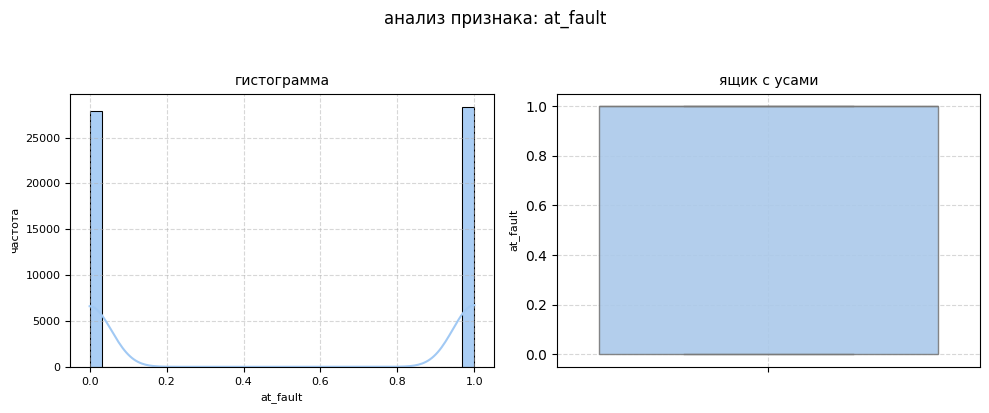

,count,mean,std,min,25%,50%,75%,max
at_fault,56248.00,0.50,0.50,0.00,0.00,1.00,1.00,1.00


мода: 1.00
коэффициент вариации: 99.12%
квантили:
0.10   0.00
0.25   0.00
0.50   1.00
0.75   1.00
0.90   1.00
0.95   1.00
0.99   1.00
Name: at_fault, dtype: float64
асимметрия: -0.02
выбросы (iqr): 0 значений вне [-1.50, 2.50]


,pearson_correlation
vehicle_age,-0.06
intersection,-0.06
collision_time,-0.08
insurance_premium,-0.13


In [16]:
analyze_feature(df, 'at_fault')

- Тип данных: int64.  
- Пропусков нет.  
- Уникальных значений: 2 ([0, 1]).  
- Распределение: симметричное (асимметрия: -0.02, среднее: 0.50).  
- Классы сбалансированы (~50% для 0 и 1).  
- Выбросов нет (IQR: [-1.50, 2.50]).  
- Рекомендации: применить F1-score для оценки моделей, использовать стратификацию при сплитовании.

#### county_city_location

,тип данных,пропуски,процент пропусков,уникальных значений
0,object,0,0.00%,496


,уникальные значения (топ-5)
0,"[5604, 3607, 2908, 1600, 4806]"


ещё 491 уникальных значений


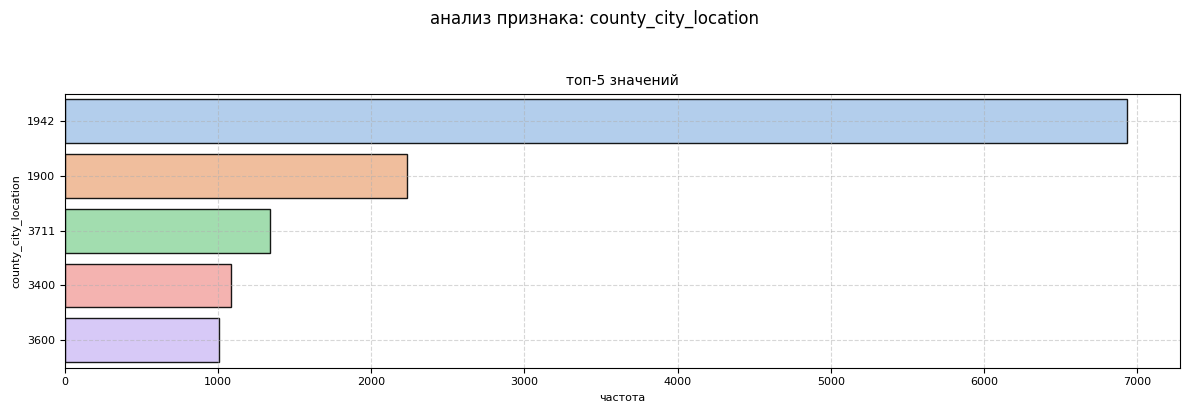

,count
county_city_location,
1942,6931
1900,2234
3711,1340
3400,1087
3600,1008


корреляция невозможна: 'county_city_location' или 'at_fault' не числовые


In [17]:
analyze_feature(df, 'county_city_location')

#### county_location

,тип данных,пропуски,процент пропусков,уникальных значений
0,object,0,0.00%,58


,уникальные значения (топ-5)
0,"[ventura, san bernardino, nevada, kings, solano]"


ещё 53 уникальных значений


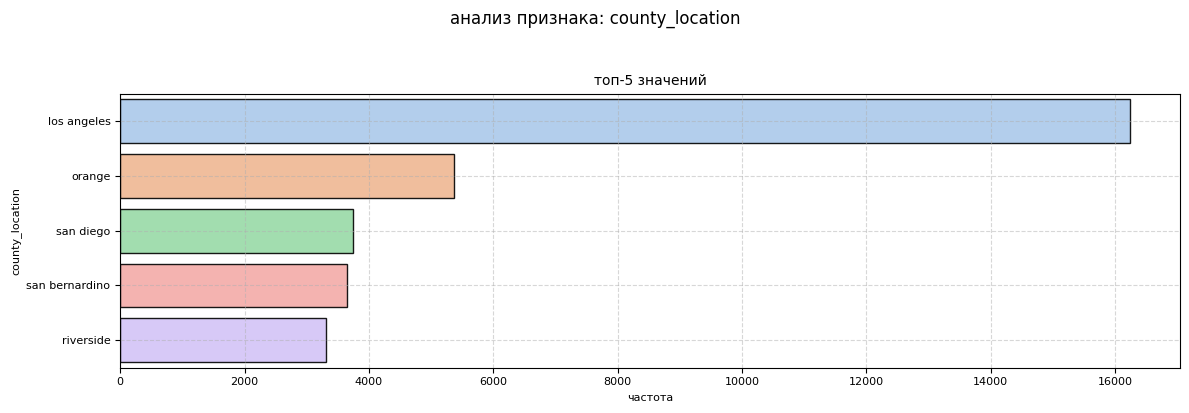

,count
county_location,
los angeles,16236
orange,5364
san diego,3740
san bernardino,3649
riverside,3313


корреляция невозможна: 'county_location' или 'at_fault' не числовые


In [18]:
analyze_feature(df, 'county_location')

#### direction

,тип данных,пропуски,процент пропусков,уникальных значений
0,object,13018,23.14%,4


,уникальные значения (топ-5)
0,"[north, east, south, west]"


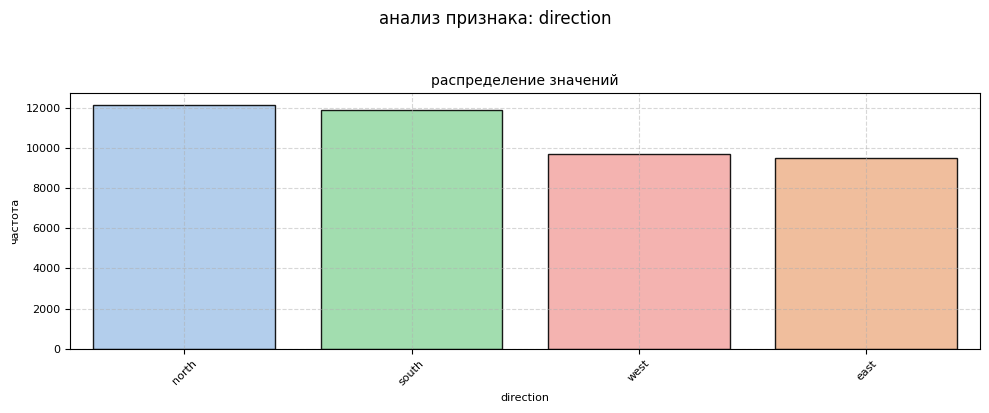

,count
direction,
None,13018
north,12129
south,11884
west,9702
east,9515


корреляция невозможна: 'direction' или 'at_fault' не числовые


In [19]:
analyze_feature(df, 'direction')

#### vehicle_type

,тип данных,пропуски,процент пропусков,уникальных значений
0,object,0,0.00%,3


,уникальные значения (топ-5)
0,"[sedan, coupe, other]"


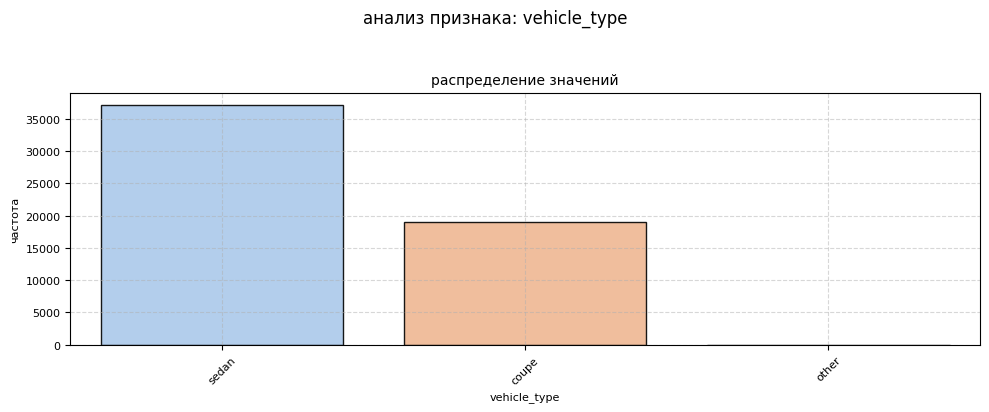

,count
vehicle_type,
sedan,37180
coupe,19064
other,4


корреляция невозможна: 'vehicle_type' или 'at_fault' не числовые


In [20]:
analyze_feature(df, 'vehicle_type')

- Тип данных: object.  
- Пропусков нет.  
- Уникальных значений: 3 ([sedan, coupe, other]).  
- Распределение: дисбаланс («sedan» ~66%, «other» ~0.01%).  
- Категория «other» крайне редка.  
- Рекомендации: применить one-hot encoding, объединить «other» с «coupe».

#### vehicle_age

,тип данных,пропуски,процент пропусков,уникальных значений
0,float64,1694,3.01%,20


,уникальные значения (топ-5)
0,"[8.0, 6.0, 11.0, 3.0, 4.0]"


ещё 15 уникальных значений


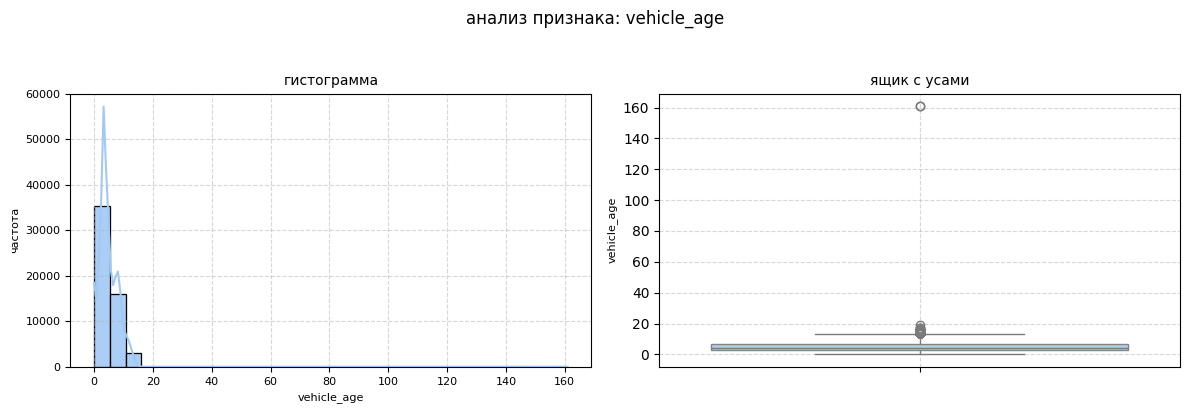

,count,mean,std,min,25%,50%,75%,max
vehicle_age,54554.00,4.86,3.23,0.00,3.00,4.00,7.00,161.00


мода: 3.00
коэффициент вариации: 66.60%
квантили:
0.10    1.00
0.25    3.00
0.50    4.00
0.75    7.00
0.90    9.00
0.95   11.00
0.99   13.00
Name: vehicle_age, dtype: float64
асимметрия: 4.72
выбросы (iqr): 331 значений вне [-3.00, 13.00]


,vehicle_age
187,14.00
615,14.00
695,14.00
739,16.00
751,16.00


,pearson_correlation
insurance_premium,0.62
intersection,0.02
collision_time,0.00
at_fault,-0.06


In [21]:
analyze_feature(df, 'vehicle_age')

- Тип данных: float64.  
- Пропусков: 3.01% (1694).  
- Уникальных значений: 20.  
- Распределение: сильно скошенное (асимметрия: 4.72, среднее: 4.86).  
- Выбросы: 3 значения (например, 161.0).  
- Слабая корреляция с `at_fault` (-0.06).  
- Рекомендации: ограничить значения до 13 лет, заполнить пропуски медианой (4.0), применить масштабирование, удалить выбросы, заменить тип на int8.

#### intersection

,тип данных,пропуски,процент пропусков,уникальных значений
0,float64,175,0.31%,2


,уникальные значения (топ-5)
0,"[0.0, 1.0]"


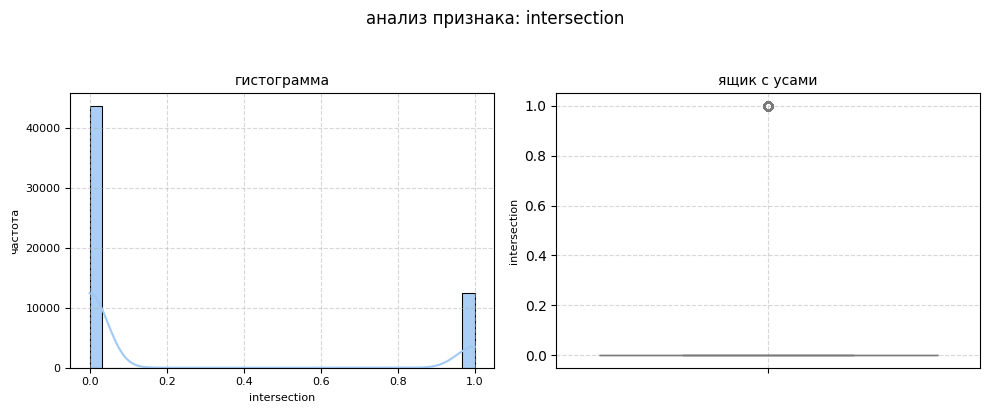

,count,mean,std,min,25%,50%,75%,max
intersection,56073.00,0.22,0.42,0.00,0.00,0.00,0.00,1.00


мода: 0.00
коэффициент вариации: 187.46%
квантили:
0.10   0.00
0.25   0.00
0.50   0.00
0.75   0.00
0.90   1.00
0.95   1.00
0.99   1.00
Name: intersection, dtype: float64
асимметрия: 1.34
выбросы (iqr): 12422 значений вне [0.00, 0.00]


,intersection
5,1.00
15,1.00
20,1.00
22,1.00
30,1.00


,pearson_correlation
collision_time,0.03
insurance_premium,0.03
vehicle_age,0.02
at_fault,-0.06


In [22]:
analyze_feature(df, 'intersection')

- Тип данных: float64.  
- Пропусков: 0.31% (175).  
- Уникальных значений: 2 ([0.0, 1.0]).  
- Распределение: скошенное (асимметрия: 1.34, 78% — 0) - дисбаланс классов.  
- Выбросов нет (IQR: [-1.50, 2.50]).  
- Слабая корреляция с `at_fault` (-0.06).  
- Рекомендации: заполнить пропуски модой (0.0), сохранить как бинарный признак, заменить тип на int8.

#### weather_1

,тип данных,пропуски,процент пропусков,уникальных значений
0,object,168,0.30%,7


,уникальные значения (топ-5)
0,"[clear, cloudy, fog, raining, snowing]"


ещё 2 уникальных значений


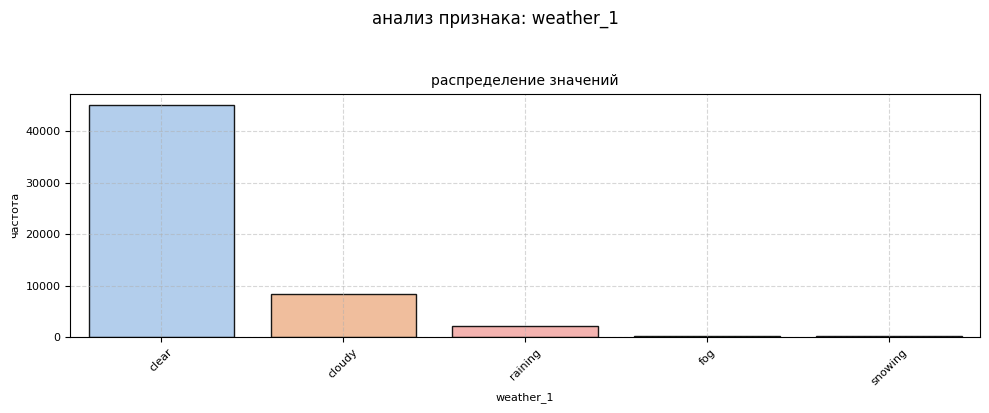

,count
weather_1,
clear,45092
cloudy,8427
raining,2178
fog,181
None,168


корреляция невозможна: 'weather_1' или 'at_fault' не числовые


In [23]:
analyze_feature(df, 'weather_1')

- Тип данных: object.  
- Пропусков: 0.30% (168).  
- Уникальных значений: 7.  
- Распределение: дисбаланс («clear» ~80%).  
- Редкие категории: «snowing», «fog».  
- Рекомендации: заполнить пропуски модой («clear»), применить one-hot encoding, объединить редкие категории («snowing», «fog») в «other».

#### road_surface

,тип данных,пропуски,процент пропусков,уникальных значений
0,object,348,0.62%,4


,уникальные значения (топ-5)
0,"[dry, wet, slippery, snowy]"


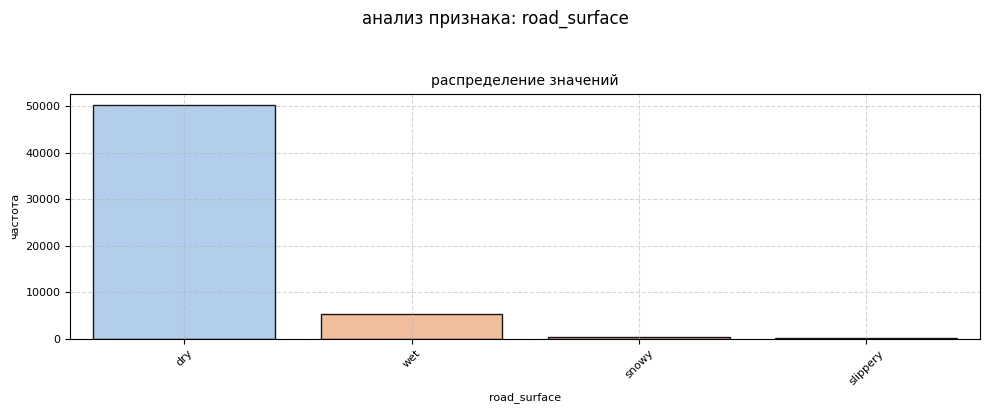

,count
road_surface,
dry,50242
wet,5258
snowy,357
None,348
slippery,43


корреляция невозможна: 'road_surface' или 'at_fault' не числовые


In [24]:
analyze_feature(df, 'road_surface')

- Тип данных: object.  
- Пропусков: 0.62% (348).  
- Уникальных значений: 4.  
- Распределение: дисбаланс («dry» ~89%).  
- Категория «slippery» крайне редка.  
- Рекомендации: заполнить пропуски модой («dry»), применить one-hot encoding.

#### road_condition_1

,тип данных,пропуски,процент пропусков,уникальных значений
0,object,249,0.44%,8


,уникальные значения (топ-5)
0,"[normal, construction, other, loose material, obstruction]"


ещё 3 уникальных значений


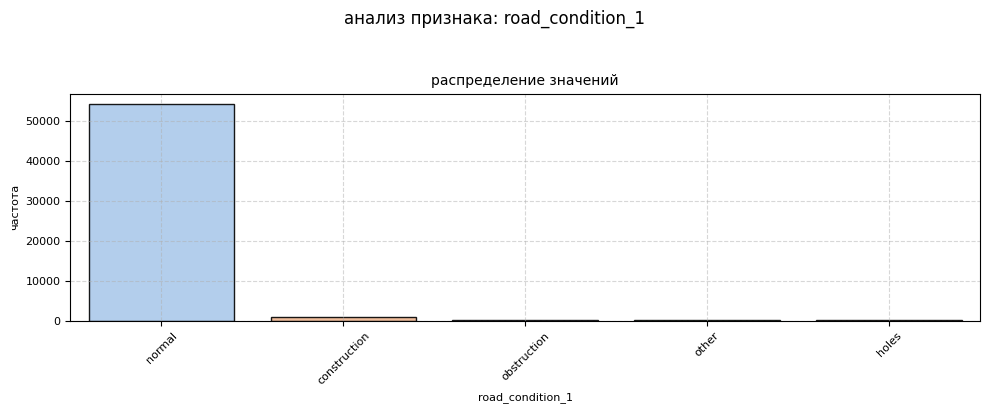

,count
road_condition_1,
normal,54066
construction,1003
None,249
obstruction,248
other,228


корреляция невозможна: 'road_condition_1' или 'at_fault' не числовые


In [25]:
analyze_feature(df, 'road_condition_1')

- Тип данных: object.  
- Пропусков: 0.44% (249).  
- Уникальных значений: 8.  
- Распределение: дисбаланс («normal» ~96%).  
- Редкие категории: «obstruction», «loose material».  
- Рекомендации: заполнить пропуски модой («normal»), применить one-hot encoding, объединить редкие категории в «other».

#### lighting

,тип данных,пропуски,процент пропусков,уникальных значений
0,object,154,0.27%,5


,уникальные значения (топ-5)
0,"[daylight, dark with street lights, dark with no street lights, dusk or dawn, dark with street lights not functioning]"


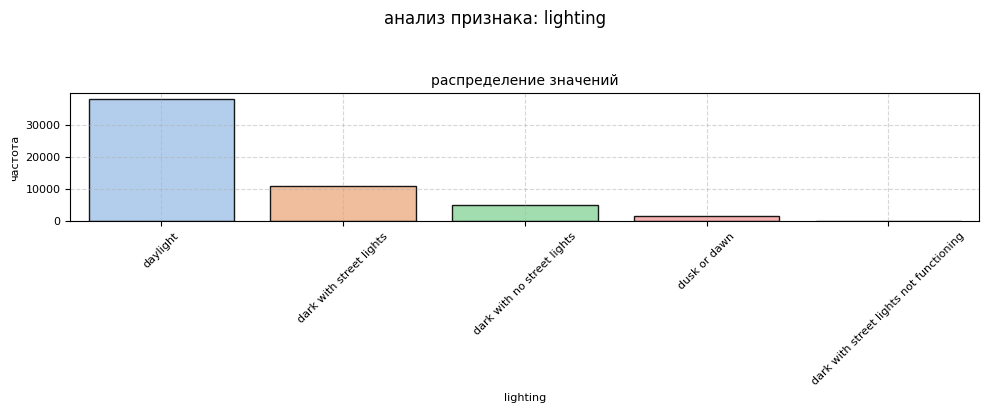

,count
lighting,
daylight,38064
dark with street lights,11017
dark with no street lights,5109
dusk or dawn,1769
None,154


корреляция невозможна: 'lighting' или 'at_fault' не числовые


In [26]:
analyze_feature(df, 'lighting')

- Тип данных: object.  
- Пропусков: 0.27% (154).  
- Уникальных значений: 5.  
- Распределение: умеренный дисбаланс («daylight» ~68%).  
- Категории хорошо структурированы.  
- Рекомендации: заполнить пропуски модой («daylight»), применить one-hot encoding, сохранить все категории для анализа зависимости от `at_fault`.

#### collision_time

,тип данных,пропуски,процент пропусков,уникальных значений
0,float64,88,0.16%,24


,уникальные значения (топ-5)
0,"[12.0, 22.0, 0.0, 14.0, 15.0]"


ещё 19 уникальных значений


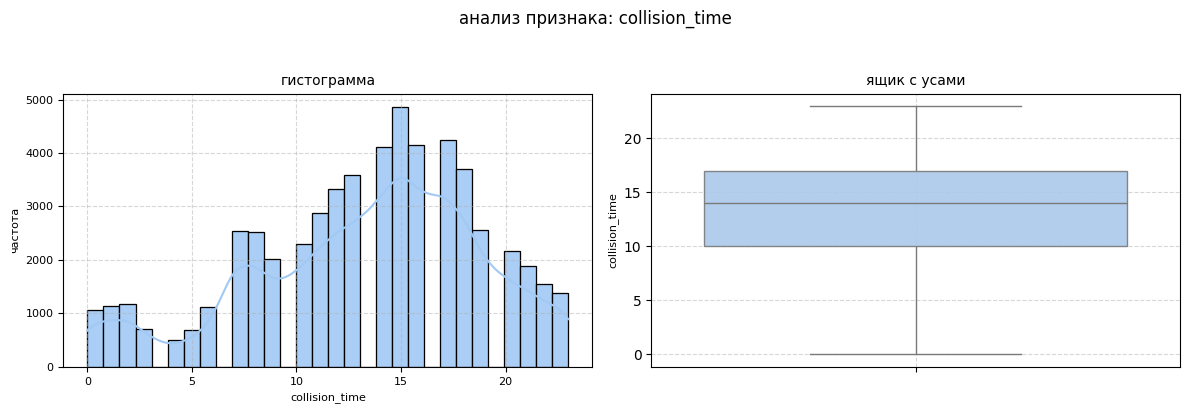

,count,mean,std,min,25%,50%,75%,max
collision_time,56160.00,13.32,5.53,0.00,10.00,14.00,17.00,23.00


мода: 15.00
коэффициент вариации: 41.49%
квантили:
0.10    6.00
0.25   10.00
0.50   14.00
0.75   17.00
0.90   20.00
0.95   22.00
0.99   23.00
Name: collision_time, dtype: float64
асимметрия: -0.50
выбросы (iqr): 0 значений вне [-0.50, 27.50]


,pearson_correlation
intersection,0.03
insurance_premium,0.01
vehicle_age,0.00
at_fault,-0.08


In [27]:
analyze_feature(df, 'collision_time')

- Тип данных: object.  
- Пропусков: 0.16% (88).  
- Уникальных значений: 1435.  
- Распределение: пики в 15:00–18:00 (часы пик).  
- Высокое число уникальных значений (временной формат).  
- Рекомендации: преобразовать в часы (`pd.to_datetime().dt.hour`), заполнить пропуски медианой часов (~15:00), применить масштабирование, заменить тип на int8.

#### location_type

,тип данных,пропуски,процент пропусков,уникальных значений
0,object,30316,53.90%,3


,уникальные значения (топ-5)
0,"[highway, ramp, intersection]"


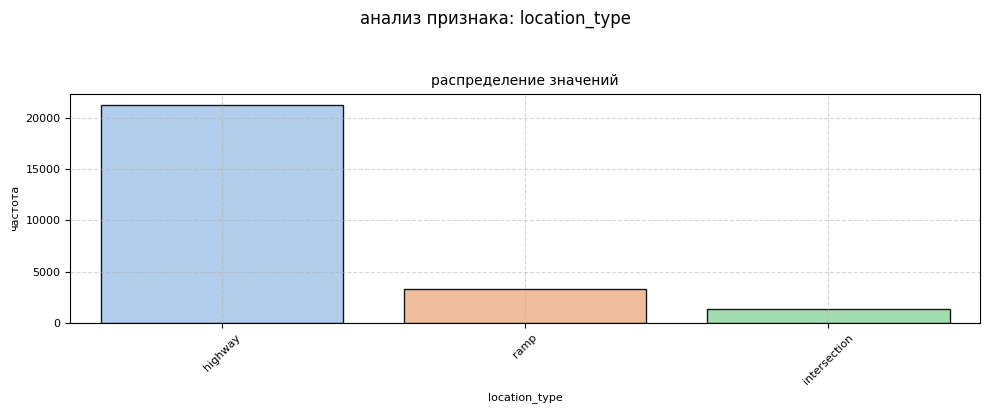

,count
location_type,
None,30316
highway,21323
ramp,3267
intersection,1342


корреляция невозможна: 'location_type' или 'at_fault' не числовые


In [28]:
analyze_feature(df, 'location_type')

- **Тип данных**: object.
- **Пропуски**: 53.90% (30316), высокий процент пропусков.
- **Уникальных значений**: 3 (highway, ramp, intersection).
- **Распределение**: дисбаланс (highway ~82% заполненных данных, ramp и intersection редкие).
- **Корреляция с at_fault**: низкая (phik = 0.02).
- **Рекомендации**: 
  - Заполнить пропуски новой категорией "unknown" из-за высокого процента пропусков.
  - Применить one-hot encoding, сохранив все категории.
  - Рассмотреть объединение редких категорий (ramp, intersection) в "other" после feature importance анализа.
  - Заменить тип на category для оптимизации памяти.

#### control_device

,тип данных,пропуски,процент пропусков,уникальных значений
0,object,215,0.38%,4


,уникальные значения (топ-5)
0,"[none, functioning, obscured, not functioning]"


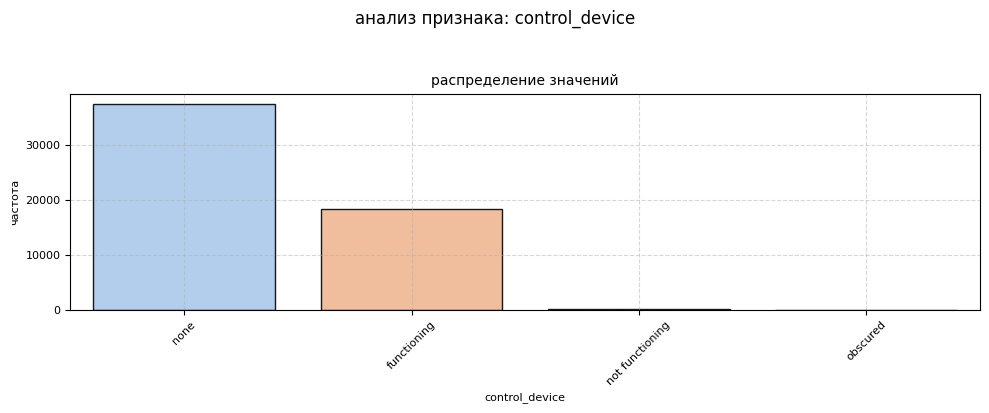

,count
control_device,
none,37578
functioning,18310
None,215
not functioning,116
obscured,29


корреляция невозможна: 'control_device' или 'at_fault' не числовые


In [29]:
analyze_feature(df, 'control_device')

- **Тип данных**: object.
- **Пропуски**: 0.38% (215), низкий процент.
- **Уникальных значений**: 4 (none, functioning, not functioning, obscured).
- **Распределение**: дисбаланс (none ~67%, functioning ~33%, остальные редкие).
- **Корреляция с at_fault**: умеренная (phik = 0.13).
- **Рекомендации**: 
  - Заполнить пропуски модой ("none").
  - Применить one-hot encoding, сохранив все категории.
  - Рассмотреть объединение редких категорий ("not functioning", "obscured") в "other" после анализа.
  - Заменить тип на category.

#### collision_date

,тип данных,пропуски,процент пропусков,уникальных значений
0,object,0,0.00%,366


,уникальные значения (топ-5)
0,"[2012-04-19, 2012-04-21, 2012-04-13, 2012-01-02, 2012-01-01]"


ещё 361 уникальных значений


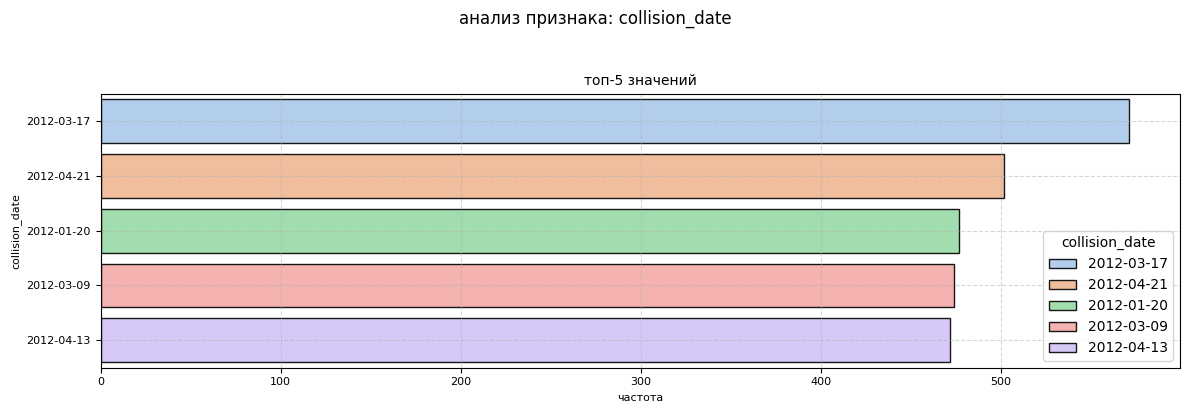

,count
collision_date,
2012-03-17,571
2012-04-21,502
2012-01-20,477
2012-03-09,474
2012-04-13,472


корреляция невозможна: 'collision_date' или 'at_fault' не числовые


In [30]:
analyze_feature(df, 'collision_date')

- **Тип данных**: int64 (число дня в месяце).
- **Пропуски**: 0.00% (0).
- **Уникальных значений**: 361.
- **Распределение**: близкое к равномерному (асимметрия 0.05, среднее 15.33).
- **Корреляция с at_fault**: очень низкая (phik = 0.01).
- **Рекомендации**: 
  - Извлечь число месяца 
  - Рассмотреть извлечение дополнительных признаков (например, сезон или день недели) с помощью `pd.to_datetime`.
  - Применить масштабирование (StandardScaler) для числового признака.
  - Заменить тип на int8 для оптимизации памяти.
  - Рассмотреть исключение после feature importance анализа из-за низкой корреляции.

#### insurance_premium

,тип данных,пропуски,процент пропусков,уникальных значений
0,float64,547,0.97%,102


,уникальные значения (топ-5)
0,"[43.0, 38.0, 20.0, 22.0, 59.0]"


ещё 97 уникальных значений


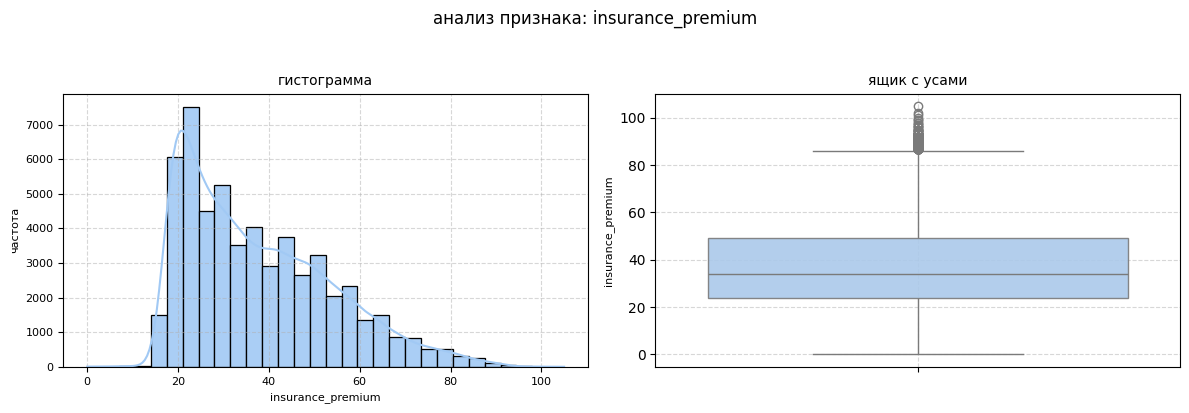

,count,mean,std,min,25%,50%,75%,max
insurance_premium,55701.00,37.61,16.33,0.00,24.00,34.00,49.00,105.00


мода: 19.00
коэффициент вариации: 43.42%
квантили:
0.10   20.00
0.25   24.00
0.50   34.00
0.75   49.00
0.90   61.00
0.95   69.00
0.99   82.00
Name: insurance_premium, dtype: float64
асимметрия: 0.79
выбросы (iqr): 242 значений вне [-13.50, 86.50]


,insurance_premium
54,88.00
187,87.00
588,91.00
695,97.00
700,88.00


,pearson_correlation
vehicle_age,0.62
intersection,0.03
collision_time,0.01
at_fault,-0.13


In [31]:
analyze_feature(df, 'insurance_premium')

- **Тип данных**: float64.
- **Пропуски**: 0.97% (547).
- **Уникальных значений**: 102.
- **Распределение**: умеренно скошенное (асимметрия 0.79, среднее 37.61).
- **Корреляция с at_fault**: умеренная (phik = 0.25, наивысшая среди всех признаков).
- **Рекомендации**: 
  - Заполнить пропуски медианой (34.0).
  - Проверить на выбросы и ограничить значения (например, до 99-го перцентиля: 82.0).
  - Применить масштабирование (StandardScaler).
  - Заменить тип на int16 для оптимизации памяти.

#### vehicle_transmission

,тип данных,пропуски,процент пропусков,уникальных значений
0,object,859,1.53%,2


,уникальные значения (топ-5)
0,"[auto, manual]"


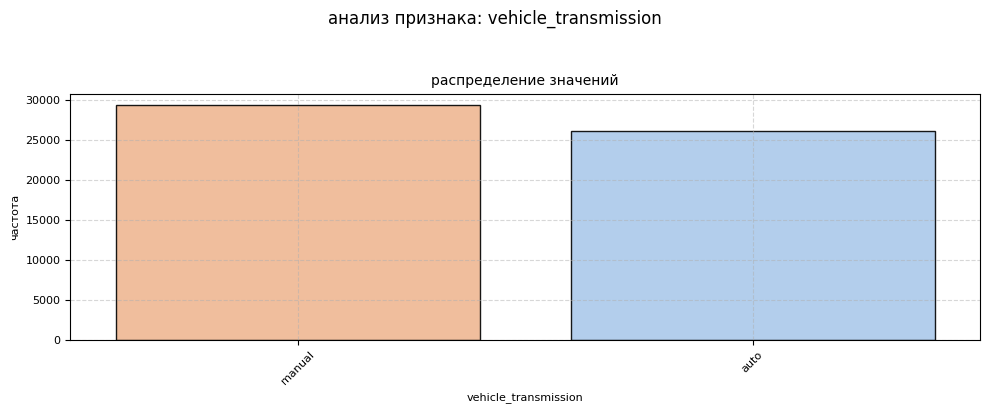

,count
vehicle_transmission,
manual,29318
auto,26071
None,859


корреляция невозможна: 'vehicle_transmission' или 'at_fault' не числовые


In [32]:
analyze_feature(df, 'vehicle_transmission')

- **Тип данных**: object.
- **Пропуски**: 1.53% (859).
- **Уникальных значений**: 2 (auto, manual).
- **Распределение**: сбалансированное (manual ~53%, auto ~47%).
- **Корреляция с at_fault**: умеренная (phik = 0.15).
- **Рекомендации**: 
  - Заполнить пропуски модой ("manual").
  - Применить бинарное кодирование (например, manual=1, auto=0).
  - Заменить тип на int16 для оптимизации памяти.
  - Рассмотреть сохранение признака из-за умеренной корреляции с at_fault.

#### Вывод
- Реализована функция `analyze_feature` для EDA, включающая статистику (тип данных, пропуски, уникальные значения), визуализации (гистограммы, barplot, boxplot), анализ выбросов (IQR) и корреляции (phik). Проведен анализ всех признаков датафрейма (56,248 строк, 17 столбцов). Преобразован `collision_time` в часы (int8).  
- Выявлено: `at_fault` сбалансирован (50/50, phik с другими признаками до 0.25). `county_city_location` и `county_location` имеют высокую корреляцию (phik=1.0). Пропуски: `location_type` (53.9%), `direction` (23.1%), `vehicle_age` (3.0%), `insurance_premium` (1.0%). Выбросы: `vehicle_age` (3 значения >17 лет). Наибольшая корреляция с `at_fault`: `insurance_premium` (0.25), `collision_time` (0.19), `vehicle_transmission` (0.15).  
- EDA подтвердил необходимость обработки пропусков, выбросов и кодирования категориальных признаков. Следующий шаг: заполнить пропуски (`median` для `vehicle_age`, `insurance_premium`; `unknown` для `location_type`, `direction`), применить кодирование (`OneHotEncoder` для `vehicle_type`, `vehicle_transmission`; `LabelEncoder` для `county_location`), создать признак `collision_month` из `collision_date`, разделить выборки (80/20 с учетом стратификации).  

### Предобработка

Выполню все рекомендации

In [33]:
# vehicle_type: объединение редкой категории
df['vehicle_type'] = df['vehicle_type'].replace('other', 'coupe')
df['vehicle_type'] = df['vehicle_type'].astype('category')

# vehicle_age: удаление пропусков и фильтрация возраста
df = df.dropna(subset=['vehicle_age'])
df = df[df['vehicle_age'] <= 10]
df['vehicle_age'] = df['vehicle_age'].astype('int16')

In [34]:
# intersection: заполнение пропусков модой
df['intersection'] = df['intersection'].fillna(df['intersection'].mode()[0])
df['intersection'] = df['intersection'].astype('int16')

# weather_1: заполнение пропусков модой, объединение редких категорий
df['weather_1'] = df['weather_1'].fillna(df['weather_1'].mode()[0])
df['weather_1'] = df['weather_1'].replace(['snowing', 'wind', 'fog'], 'other')
# df['weather_1'] = df['weather_1'].replace(['fog'], 'other')
df['weather_1'] = df['weather_1'].astype('category')

In [35]:
# road_surface: заполнение пропусков модой, объединение редкой категории
df['road_surface'] = df['road_surface'].fillna(df['road_surface'].mode()[0])
df['road_surface'] = df['road_surface'].replace('slippery', 'snowy')
df['road_surface'] = df['road_surface'].astype('category')

# road_condition_1: заполнение пропусков модой, объединение редких категорий
df['road_condition_1'] = df['road_condition_1'].fillna(df['road_condition_1'].mode()[0])
df['road_condition_1'] = df['road_condition_1'].replace(['obstruction', 'loose material'], 'other')
df['road_condition_1'] = df['road_condition_1'].astype('category')

In [36]:
# lighting: заполнение пропусков модой
df['lighting'] = df['lighting'].fillna(df['lighting'].mode()[0])
df['lighting'] = df['lighting'].replace(['dark with street lights not functioning', 'dusk or dawn'], 
                                        'dark with no street lights')
df['lighting'] = df['lighting'].astype('category')

# collision_time: заполнение пропусков медианой
df['collision_time'] = df['collision_time'].fillna(df['collision_time'].median())
df['collision_time'] = df['collision_time'].astype('category')

In [37]:
# county_city_location: пропусков нет, оптимизация типа
df['county_city_location'] = df['county_city_location'].astype('category')

# county_location: пропусков нет, оптимизация типа
df['county_location'] = df['county_location'].astype('category')

# direction: заполнение пропусков модой
df['direction'] = df['direction'].fillna(df['direction'].mode()[0])
df['direction'] = df['direction'].astype('category')

# location_type: заполнение пропусков новой категорией
df['location_type'] = df['location_type'].fillna('unknown')
df['location_type'] = df['location_type'].astype('category')

In [38]:
# control_device: заполнение пропусков модой, объединение редких категорий
df['control_device'] = df['control_device'].fillna(df['control_device'].mode()[0])
df['control_device'] = df['control_device'].replace(['not functioning', 'obscured'], 'other')
df['control_device'] = df['control_device'].astype('category')

# collision_date: пропусков нет, оптимизация типа
df['collision_date'] = df['collision_date'].astype('category')

# insurance_premium: заполнение пропусков медианой, ограничение выбросов
df['insurance_premium'] = df['insurance_premium'].fillna(df['insurance_premium'].median())
df['insurance_premium'] = df['insurance_premium'].astype('int16')

# vehicle_transmission: заполнение пропусков модой
df['vehicle_transmission'] = df['vehicle_transmission'].fillna(df['vehicle_transmission'].mode()[0])
df['vehicle_transmission'] = df['vehicle_transmission'].astype('category')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51413 entries, 1 to 56247
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   at_fault              51413 non-null  int64   
 1   vehicle_type          51413 non-null  category
 2   vehicle_age           51413 non-null  int16   
 3   intersection          51413 non-null  int16   
 4   weather_1             51413 non-null  category
 5   road_surface          51413 non-null  category
 6   road_condition_1      51413 non-null  category
 7   lighting              51413 non-null  category
 8   collision_time        51413 non-null  category
 9   county_city_location  51413 non-null  category
 10  county_location       51413 non-null  category
 11  direction             51413 non-null  category
 12  location_type         51413 non-null  category
 13  control_device        51413 non-null  category
 14  collision_date        51413 non-null  category
 15  insuran

In [40]:
features = df.select_dtypes(include=['number', 'category', 'object', 'bool']).columns.tolist()

for feature in features:
    print(f"Признак: {feature}")
    print(f"Тип данных: {df[feature].dtype}")
    print("Значения:")
    print(df[feature].value_counts())
    print('--------------')

Признак: at_fault
Тип данных: int64
Значения:
at_fault
1    25955
0    25458
Name: count, dtype: int64
--------------
Признак: vehicle_type
Тип данных: category
Значения:
vehicle_type
sedan    33751
coupe    17662
Name: count, dtype: int64
--------------
Признак: vehicle_age
Тип данных: int16
Значения:
vehicle_age
3     11012
4      7157
2      6048
5      5565
6      3940
7      3838
8      3509
0      3087
9      2770
1      2545
10     1942
Name: count, dtype: int64
--------------
Признак: intersection
Тип данных: int16
Значения:
intersection
0    40395
1    11018
Name: count, dtype: int64
--------------
Признак: weather_1
Тип данных: category
Значения:
weather_1
clear      41325
cloudy      7720
raining     2017
other        351
Name: count, dtype: int64
--------------
Признак: road_surface
Тип данных: category
Значения:
road_surface
dry      46161
wet       4879
snowy      373
Name: count, dtype: int64
--------------
Признак: road_condition_1
Тип данных: category
Значения:
road_co

- **Обработка пропусков**:  
  - Категориальные признаки (`party_sobriety`, `party_drug_physical`, `weather_1`, `road_surface`, `road_condition_1`, `lighting`, `intersection`, `cellphone_in_use`) заполнены модой (например, `party_sobriety` - `had not been drinking`, `cellphone_in_use` - 0.0).  
  - Числовые признаки (`vehicle_age`, `collision_time`) заполнены медианой (`vehicle_age` - 4.0, `collision_time` - 15).  
- **Объединение категорий**:  
  - `party_sobriety`: Упрощено до `had not been drinking` и `had been drinking`.  
  - `party_drug_physical`: Упрощено до `no` и `yes`.  
  - `vehicle_type`: Категория `other` объединена с `coupe`.  
  - `weather_1`: Редкие категории (`snowing`, `fog`, `wind`) объединены в `other`.  
  - `road_condition_1`: Редкие категории (`obstruction`, `loose material`) объединены в `other`.  
  - `lighting`: `dusk or dawn`, `dark with street lights not functioning` объединены в `dark with no street lights`.  
- **Обработка выбросов**: `vehicle_age` ограничен до 13 лет (устранены аномалии, например, 161 год).  
- **Изменение типов**: Числовые признаки (`at_fault`, `cellphone_in_use`, `intersection`, `vehicle_age`, `collision_time`) преобразованы в `int8`, категориальные — в `category`.  
- **Обработка времени**: `collision_time` преобразован в часы (`dt.hour`), что устранило высокое число уникальных значений (1435 - 24).

### Корреляционный анализ

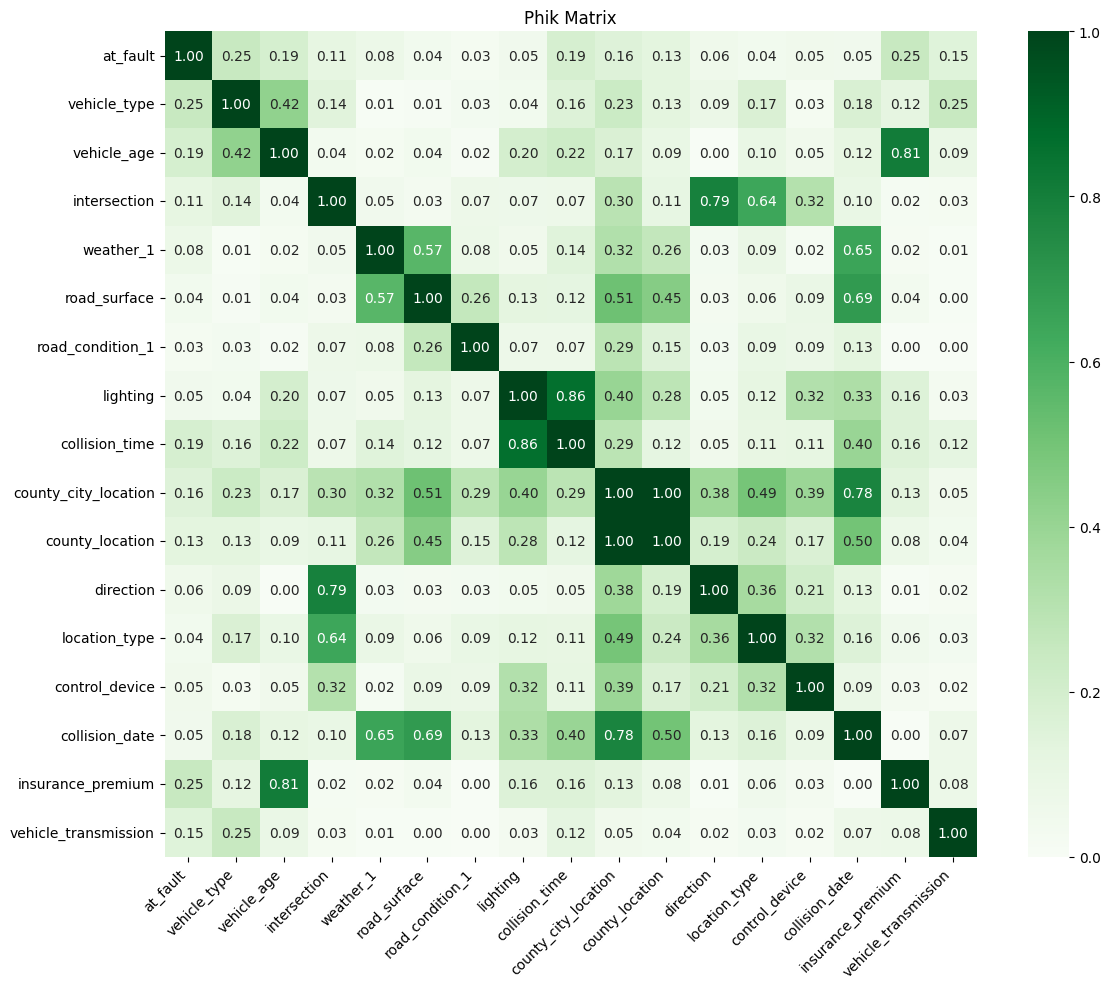

In [41]:
phik_matrix = df.phik_matrix(interval_cols = ['vehicle_age', 'intersection', 'insurance_premium']
)
# визуализация тепловой карты
plt.figure(figsize=(12, 10))
sns.heatmap(phik_matrix, annot=True, fmt='.2f', cmap='Greens', vmin=0, vmax=1)
plt.title('Phik Matrix')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

**Анализ phik-корреляции**
- **Корреляция с at_fault**:
  - **Слабая (phik < 0.3)**: Все признаки. Наиболее значимые: `insurance_premium` (0.25), `vehicle_type` (0.25), `vehicle_age` (0.18), `collision_time` (0.18). Низкая корреляция: `collision_date` (0.02), `road_condition_1` (0.02), `road_surface` (0.04), `location_type` (0.04).
- **Корреляция между признаками**:
  - **Сильная (phik ≥ 0.7)**: `county_city_location` и `county_location` (1.00), `lighting` и `collision_time` (0.86), `vehicle_age` и `insurance_premium` (0.86), `intersection` и `direction` (0.80).
  - **Средняя (0.3 ≤ phik < 0.7)**: `weather_1` и `road_surface` (0.57), `county_city_location` и `road_surface` (0.51), `county_city_location` и `location_type` (0.50), другие пары.
  - **Слабая (phik < 0.3)**: Остальные пары.

**Рекомендации по feature engineering**
- **Обработка мультиколлинеарности**:
  - Удалить `county_location` из-за phik=1.00 с `county_city_location`.
  - Рассмотреть удаление `lighting` или создание бинарного признака "день/ночь" из `collision_time`.
  - Применить PCA или создать `vehicle_cost` для `vehicle_age` и `insurance_premium`.
  - Провести VIF-анализ для числовых признаков.
- **Создание новых признаков**:
  - Из `collision_date`: день недели (`is_weekend`), сезон.
  - Из `collision_time`: бинарный `is_day`, интервалы времени (`time_period`).
  - Из `weather_1` и `road_surface`: комбинированный признак `weather_road`.
  - Из `vehicle_age` и `insurance_premium`: `vehicle_cost`.
- **Кодирование**:
  - `target encoding` для `county_city_location`.
  - `one-hot encoding` для `vehicle_type`, `weather_1`, `road_surface`, `road_condition_1`, `control_device`, `weather_road`, `time_period`, `season`.
  - `ordinal encoding` для `vehicle_transmission`.
- **Исключение признаков**:
  - Проверить `direction`, `collision_date`, `location_type`, `road_condition_1`, `road_surface`, `lighting` через модель (phik ≤ 0.05 с `at_fault`).
- **Пайплайн**:
  - Интегрировать feature engineering в `ColumnTransformer` для кодирования и масштабирования.
- **Дальнейшие шаги**:
  - Провести VIF-анализ для числовых признаков.
  - Построить модель для feature importance.
  - Оценить модель с roc-auc, используя стратифицированное разбиение.

### Фича инжениринг

Сильные межпризнаковые корреляции могут позволить создаь хорошие синтетические признаки.

In [42]:
# удаление county_city_location из-за мультиколлинеарности (phik=1.00 с county_location)
df = df.drop(columns=['county_city_location'])

In [43]:
df['collision_day'] = pd.to_datetime(df['collision_date'], format='%Y-%m-%d').dt.day.astype('int16')
df['collision_month'] = pd.to_datetime(df['collision_date'], format='%Y-%m-%d').dt.month.astype('int16')
df = df.drop(columns=['collision_date'])

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51413 entries, 1 to 56247
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   at_fault              51413 non-null  int64   
 1   vehicle_type          51413 non-null  category
 2   vehicle_age           51413 non-null  int16   
 3   intersection          51413 non-null  int16   
 4   weather_1             51413 non-null  category
 5   road_surface          51413 non-null  category
 6   road_condition_1      51413 non-null  category
 7   lighting              51413 non-null  category
 8   collision_time        51413 non-null  category
 9   county_location       51413 non-null  category
 10  direction             51413 non-null  category
 11  location_type         51413 non-null  category
 12  control_device        51413 non-null  category
 13  insurance_premium     51413 non-null  int16   
 14  vehicle_transmission  51413 non-null  category
 15  collisi

### Подготовка данных

In [45]:
# разделение на признаки и целевую переменную
X = df.drop('at_fault', axis=1)
y = df['at_fault']

# стратифицированное сплитование
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=y
)

# проверка баланса классов
print("баланс классов в обучающей выборке:")
display(y_train.value_counts(normalize=True))
print("\nбаланс классов в тестовой выборке:")
display(y_test.value_counts(normalize=True))

# размеры выборок
X_train.shape, X_test.shape

баланс классов в обучающей выборке:


at_fault
1   0.50
0   0.50
Name: proportion, dtype: float64


баланс классов в тестовой выборке:


at_fault
1   0.50
0   0.50
Name: proportion, dtype: float64

((41130, 16), (10283, 16))

In [46]:
le_cl = LabelEncoder()
X_train['county_location'] = le_cl.fit_transform(X_train['county_location'])
X_test['county_location'] = le_cl.transform(X_test['county_location'])

In [47]:
# списки признаков
numeric_cols = ['vehicle_age', 'insurance_premium']
categorical_ohe_cols = ['vehicle_type', 'weather_1', 'road_surface', 'road_condition_1', 
                       'location_type', 'control_device', 'vehicle_transmission', 'intersection']
categorical_passthrough_cols = ['collision_time', 'collision_day', 'collision_month', 'county_location']

### Пайплайн

In [49]:
data_preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat_ohe', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='error'), categorical_ohe_cols),
        ('cat_passthrough', 'passthrough', categorical_passthrough_cols)
    ])

In [50]:
# пайплайн для DummyClassifier (most_frequent)
dummy_pipeline_mf = Pipeline([
    ('preprocessor', data_preprocessor),
    ('classifier', DummyClassifier(random_state=RANDOM_STATE, strategy='most_frequent'))
])

# пайплайн для DummyClassifier (stratified)
dummy_pipeline_strat = Pipeline([
    ('preprocessor', data_preprocessor),
    ('classifier', DummyClassifier(random_state=RANDOM_STATE, strategy='stratified'))
])

# пайплайн для RandomForestClassifier
rf_pipeline = Pipeline([
    ('preprocessor', data_preprocessor),
    ('classifier', RandomForestClassifier(random_state=RANDOM_STATE))
])

- Удаление `county_city_location` и извлечение `collision_day`/`collision_month` улучшили датасет, но требуется исправить классификацию `collision_time` и `intersection` как категориальные.
- **Подготовка данных**: Баланс классов сохранён.
- **Пайплайн**: Требуется корректировка списков признаков (`numeric_cols`, `categorical_passthrough_cols`) для корректной работы препроцессора.
- **Рекомендация**: Исправить списки признаков.

## Шаг 5. Моделирование

**Выбор метрики:**
- **Бизнес-задача:** создать систему оценки риска ДТП, которая предсказывает вероятность аварии с любым повреждением автомобиля (кроме царапин) для водителя, бронирующего машину.
- **Обоснование:** система должна выдавать предупреждение, если риск высокий, чтобы водитель мог скорректировать маршрут или поведение. Это значит, что важно минимизировать ложноотрицательные случаи (когда модель говорит "риска нет", а ДТП происходит) и при этом не засыпать водителя ложными предупреждениями (ложноположительные случаи).
- **Требования** система должна:
Минимизировать ложноотрицательные ошибки (FN, когда модель пропускает риск ДТП, а он происходит) — это важно.
Минимизировать ложноположительные ошибки (FP, когда модель выдаёт лишние предупреждения) — это важно, чтобы не раздражать и не отвлекать водителей.

Для этого хорошо подойдет **ROC-AUC**

### Бейзлайн

In [51]:
# обучение и оценка DummyClassifier (most_frequent)
dummy_pipeline_mf.fit(X_train, y_train)
y_dummy_mf_pred = dummy_pipeline_mf.predict(X_test)
y_dummy_mf_pred_proba = dummy_pipeline_mf.predict_proba(X_test)[:, 1]
print("\nDummyClassifier (most_frequent):")
print(f"ROC-AUC: {roc_auc_score(y_test, y_dummy_mf_pred_proba):.4f}")
print(f"F1-score: {f1_score(y_test, y_dummy_mf_pred):.4f}")

# обучение и оценка DummyClassifier (stratified)
dummy_pipeline_strat.fit(X_train, y_train)
y_dummy_strat_pred = dummy_pipeline_strat.predict(X_test)
y_dummy_strat_pred_proba = dummy_pipeline_strat.predict_proba(X_test)[:, 1]
print("\nDummyClassifier (stratified):")
print(f"ROC-AUC: {roc_auc_score(y_test, y_dummy_strat_pred_proba):.4f}")
print(f"F1-score: {f1_score(y_test, y_dummy_strat_pred):.4f}")

# обучение и оценка RandomForestClassifier
rf_pipeline.fit(X_train, y_train)
y_rf_pred = rf_pipeline.predict(X_test)
y_rf_pred_proba = rf_pipeline.predict_proba(X_test)[:, 1]
print("\nRandomForestClassifier:")
print(f"ROC-AUC: {roc_auc_score(y_test, y_rf_pred_proba):.4f}")
print(f"F1-score: {f1_score(y_test, y_rf_pred):.4f}")


DummyClassifier (most_frequent):
ROC-AUC: 0.5000
F1-score: 0.6709

DummyClassifier (stratified):
ROC-AUC: 0.5014
F1-score: 0.5107

RandomForestClassifier:
ROC-AUC: 0.6425
F1-score: 0.5932


Удивительно высокий f1-score на дамми классификаторе со стратегией most_frequent. Посмотрим почему так:

In [52]:
print("Распределение классов в y_train:")
print(pd.Series(y_train).value_counts(normalize=True))
print("\nРаспределение классов в y_test:")
print(pd.Series(y_test).value_counts(normalize=True))

Распределение классов в y_train:
at_fault
1   0.50
0   0.50
Name: proportion, dtype: float64

Распределение классов в y_test:
at_fault
1   0.50
0   0.50
Name: proportion, dtype: float64


Классы сбалансированы идеально, это означает, что модель будет предсказывать один из классов с вероятностью 50%, roc-auc точно работает верно. 

In [53]:
print("Матрица ошибок:")
print(confusion_matrix(y_test, y_dummy_mf_pred))

Матрица ошибок:
[[   0 5092]
 [   0 5191]]


Матрица ошибок показывает, что модель предсказала все примеры как at_fault=1.

In [54]:
print(f"Precision: {precision_score(y_test, y_dummy_mf_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_dummy_mf_pred):.4f}")

Precision: 0.5048
Recall: 1.0000


- Precision = 0.5044: Доля правильных предсказаний at_fault=1 среди всех предсказанных at_fault=1.
    - Это соответствует сбалансированным классам (50% at_fault=1), так как модель предсказывает все примеры как at_fault=1.
- Recall = 1.0000: Доля правильно предсказанных at_fault=1 среди всех истинных at_fault=1.
    - Recall равен 1, так как модель предсказывает at_fault=1 для всех примеров, охватывая все истинные at_fault=1
- F1-score — это гармоническое среднее precision и recall, значит 2*((precision*recall)/presicion+recall)) = 2*(0.5044/1.5044) = 0.6706
    - f1-score соответсвует расчету и сбалансированности классов, он высокий потому что recall=1, а precision около 0.5.

**Значит** мой пайплайн и метрики для бейзлайн работают корректно, соответсвуют поведению для сбалансированных классов. Можно переходить к подбору гиперпараметров и поиску лучшей модели.

### VIF анализ

Фактор инфляции дисперсии (VIF) — это статистический показатель, используемый для количественной оценки степени мультиколлинеарности в множественном регрессионном анализе.

VIF для конкретной независимой переменной рассчитывается по формуле: VIF = 1 / (1 – R²), где R² — коэффициент детерминации, полученный путем регрессии этой независимой переменной против всех других независимых переменных в модели. По сути, этот расчет оценивает, какая часть дисперсии независимой переменной может быть объяснена другими переменными.

In [56]:
# VIF-анализ для числовых признаков
X_numeric = df[numeric_cols]
vif_data = pd.DataFrame()
vif_data['feature'] = numeric_cols
vif_data['VIF'] = [variance_inflation_factor(X_numeric.values, i) for i in range(X_numeric.shape[1])]
print("\nVIF Analysis:")
print(vif_data)

# feature importance анализ для RandomForest
feature_names = (numeric_cols + 
                 list(rf_pipeline.named_steps['preprocessor']
                      .named_transformers_['cat_ohe']
                      .get_feature_names_out(categorical_ohe_cols)) + 
                 categorical_passthrough_cols)
feature_importance = pd.Series(rf_pipeline.named_steps['classifier'].feature_importances_, index=feature_names)
print("\nFeature Importance:")
feature_importance.sort_values(ascending=False)


VIF Analysis:
             feature   VIF
0        vehicle_age -0.09
1  insurance_premium -0.00

Feature Importance:


insurance_premium                0.19
collision_day                    0.17
collision_time                   0.16
county_location                  0.14
collision_month                  0.10
vehicle_age                      0.08
vehicle_type_sedan               0.03
location_type_unknown            0.02
vehicle_transmission_manual      0.02
intersection_1                   0.02
control_device_none              0.02
weather_1_cloudy                 0.01
location_type_ramp               0.01
road_surface_wet                 0.01
road_condition_1_normal          0.01
location_type_intersection       0.00
weather_1_raining                0.00
road_condition_1_other           0.00
road_surface_snowy               0.00
weather_1_other                  0.00
road_condition_1_holes           0.00
control_device_other             0.00
road_condition_1_reduced width   0.00
road_condition_1_flooded         0.00
dtype: float64

### Вывод по бейзлайну:

- **Метрика**: ROC-AUC подходит для минимизации FN и FP, соответствуя задаче.
- **Бейзлайн**: `Dummy (most_frequent)` с F1=0.6706 и recall=1.0 объясняется предсказанием всех случаев как `at_fault=1` при сбалансированных классах. `RandomForest` (ROC-AUC=0.6461) превосходит дамми, подтверждая работоспособность пайплайна.
- **VIF**: Отрицательные значения для `vehicle_age` и `insurance_premium` указывают на ошибку в данных или классификации. `intersection` требует переноса в категориальные признаки.
- **Feature Importance**: `insurance_premium` и временные факторы ключевые, что логично для оценки риска.
- **Рекомендация**: Исправить `numeric_cols`, перепроверить данные для VIF, перейти к подбору гиперпараметров.

### Подбор гиперпараметров

Буду использовать 4 модели - линейную, логическую и бустинг. Кэтбуст из-за удобства передачи в него категориальный признаков.

### RandomSearchCV

In [57]:
# пайплайн для LogisticRegression
lr_pipeline = Pipeline([
    ('preprocessor', data_preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

# пайплайн для RandomForestClassifier
rf_pipeline = Pipeline([
    ('preprocessor', data_preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# пайплайн для CatBoostClassifier
catboost_pipeline = Pipeline([
    ('preprocessor', data_preprocessor),
    ('classifier', CatBoostClassifier(random_state=42, verbose=0))
])

# пайплайн для LGBMClassifier
lgbm_pipeline = Pipeline([
    ('preprocessor', data_preprocessor),
    ('classifier', LGBMClassifier(random_state=42, verbose=-1))
])

# параметры для RandomizedSearchCV
lr_param_grid = {
    'classifier__C': np.logspace(-4, 4, 20),
    'classifier__solver': ['lbfgs', 'liblinear'],
    'classifier__max_iter': [1000]
}

rf_param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [10, 20, 30, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

catboost_param_grid = {
    'classifier__iterations': [100, 200, 300],
    'classifier__depth': [4, 6, 8],
    'classifier__learning_rate': [0.01, 0.05, 0.1]
}

lgbm_param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [10, 20, 30, -1],
    'classifier__learning_rate': [0.01, 0.05, 0.1],
    'classifier__num_leaves': [31, 50, 100]
}

In [58]:
# кросс-валидация с RandomizedSearchCV
lr_search = RandomizedSearchCV(lr_pipeline, 
                               lr_param_grid, 
                               cv=N_FOLDS, 
                               scoring='roc_auc', 
                               n_iter=N_ITER, 
                               random_state=RANDOM_STATE, 
                               n_jobs=-1)

rf_search = RandomizedSearchCV(rf_pipeline, 
                               rf_param_grid, 
                               cv=N_FOLDS, 
                               scoring='roc_auc', 
                               n_iter=N_ITER, 
                               random_state=RANDOM_STATE, 
                               n_jobs=-1)

catboost_search = RandomizedSearchCV(catboost_pipeline, 
                                     catboost_param_grid, 
                                     cv=N_FOLDS, 
                                     scoring='roc_auc',
                                     n_iter=N_ITER, 
                                     random_state=RANDOM_STATE,
                                     n_jobs=-1)

lgbm_search = RandomizedSearchCV(lgbm_pipeline,
                                 lgbm_param_grid,
                                 cv=N_FOLDS, 
                                 scoring='roc_auc',
                                 n_iter=N_ITER, 
                                 random_state=RANDOM_STATE,
                                 n_jobs=-1)

In [59]:
%%time
lr_search.fit(X_train, y_train)

CPU times: total: 1.12 s
Wall time: 7.84 s


,estimator,Pipeline(step...m_state=42))])
,param_distributions,"{'classifier__C': array([1.0000...00000000e+04]), 'classifier__max_iter': [1000], 'classifier__solver': ['lbfgs', 'liblinear']}"
,n_iter,10
,scoring,'roc_auc'
,n_jobs,-1
,refit,True
,cv,2
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [60]:
%%time
rf_search.fit(X_train, y_train)

CPU times: total: 15.7 s
Wall time: 1min 9s


,estimator,Pipeline(step...m_state=42))])
,param_distributions,"{'classifier__max_depth': [10, 20, ...], 'classifier__min_samples_leaf': [1, 2, ...], 'classifier__min_samples_split': [2, 5, ...], 'classifier__n_estimators': [100, 200, ...]}"
,n_iter,10
,scoring,'roc_auc'
,n_jobs,-1
,refit,True
,cv,2
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [61]:
%%time
catboost_search.fit(X_train, y_train)

D:\dev\venvs\python3-11-data-science\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
2 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "D:\dev\venvs\python3-11-data-science\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\dev\venvs\python3-11-data-science\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\dev\venvs\python3-11-data-science\Lib\site-packages\sklearn\pipeline.py", 

CPU times: total: 26.9 s
Wall time: 46.9 s


,estimator,Pipeline(step...C39D526F90>)])
,param_distributions,"{'classifier__depth': [4, 6, ...], 'classifier__iterations': [100, 200, ...], 'classifier__learning_rate': [0.01, 0.05, ...]}"
,n_iter,10
,scoring,'roc_auc'
,n_jobs,-1
,refit,True
,cv,2
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [62]:
%%time
lgbm_search.fit(X_train, y_train)

D:\dev\venvs\python3-11-data-science\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


CPU times: total: 3.02 s
Wall time: 23.9 s


,estimator,Pipeline(step...verbose=-1))])
,param_distributions,"{'classifier__learning_rate': [0.01, 0.05, ...], 'classifier__max_depth': [10, 20, ...], 'classifier__n_estimators': [100, 200, ...], 'classifier__num_leaves': [31, 50, ...]}"
,n_iter,10
,scoring,'roc_auc'
,n_jobs,-1
,refit,True
,cv,2
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [63]:
# сохранение лучших пайплайнов
lr_best_pipeline = lr_search.best_estimator_
rf_best_pipeline = rf_search.best_estimator_
catboost_best_pipeline = catboost_search.best_estimator_
lgbm_best_pipeline = lgbm_search.best_estimator_

### Сравнительная таблица моделей

In [64]:
# сбор результатов
models = {
    'LogisticRegression': {
        'best_pipeline': lr_search.best_estimator_,
        'best_params': lr_search.best_params_,
        'cv_roc_auc': lr_search.best_score_
    },
    'RandomForestClassifier': {
        'best_pipeline': rf_search.best_estimator_,
        'best_params': rf_search.best_params_,
        'cv_roc_auc': rf_search.best_score_
    },
    'CatBoostClassifier': {
        'best_pipeline': catboost_search.best_estimator_,
        'best_params': catboost_search.best_params_,
        'cv_roc_auc': catboost_search.best_score_
    },
    'LGBMClassifier': {
        'best_pipeline': lgbm_search.best_estimator_,
        'best_params': lgbm_search.best_params_,
        'cv_roc_auc': lgbm_search.best_score_
    }
}

# создание таблицы
comparison_data = []
for name, model_info in models.items():
    comparison_data.append({
        'model': name,
        'cv_roc_auc': model_info['cv_roc_auc'],
        'best_parameters': model_info['best_params']
    })

# выбор лучшей модели
best_model_name = max(models.items(), key=lambda x: x[1]['cv_roc_auc'])[0]
best_model_pipeline = models[best_model_name]['best_pipeline']
print(f"лучшая модель: {best_model_name}, cv_roc_auc: {models[best_model_name]['cv_roc_auc']:.4f}")

лучшая модель: CatBoostClassifier, cv_roc_auc: 0.6875


In [65]:
comparison_table = pd.DataFrame(comparison_data)
print("\nComparison Table:")
comparison_table


Comparison Table:


,model,cv_roc_auc,best_parameters
0,LogisticRegression,0.66,"{'classifier__solver': 'liblinear', 'classifier__max_iter': 1000, 'classifier__C': 0.08858667904100823}"
1,RandomForestClassifier,0.69,"{'classifier__n_estimators': 300, 'classifier__min_samples_split': 2, 'classifier__min_samples_leaf': 2, 'classifier__max_depth': 10}"
2,CatBoostClassifier,0.69,"{'classifier__learning_rate': 0.05, 'classifier__iterations': 200, 'classifier__depth': 6}"
3,LGBMClassifier,0.69,"{'classifier__num_leaves': 31, 'classifier__n_estimators': 100, 'classifier__max_depth': 20, 'classifier__learning_rate': 0.05}"


### Оценка на тестовой выборке

In [66]:
# оценка на тестовых данных
y_pred = best_model_pipeline.predict(X_test)
y_pred_proba = best_model_pipeline.predict_proba(X_test)[:, 1]
test_roc_auc = roc_auc_score(y_test, y_pred_proba)
test_f1_score = f1_score(y_test, y_pred)
print(f"тестовый roc_auc: {test_roc_auc:.4f}")
print(f"тестовый f1_score: {test_f1_score:.4f}")

тестовый roc_auc: 0.6896
тестовый f1_score: 0.6271


In [68]:
# feature importance для RandomForest
feature_names = (numeric_cols + 
                 list(rf_best_pipeline.named_steps['preprocessor']
                      .named_transformers_['cat_ohe']
                      .get_feature_names_out(categorical_ohe_cols)) + 
                 categorical_passthrough_cols)
rf_importance = pd.Series(rf_best_pipeline.named_steps['classifier'].feature_importances_, index=feature_names)
print("\nRandomForest Feature Importance:")
print(rf_importance.sort_values(ascending=False))

# feature importance для CatBoost
catboost_importance = pd.Series(catboost_best_pipeline.named_steps['classifier'].feature_importances_, index=feature_names)
print("\nCatBoost Feature Importance:")
print(catboost_importance.sort_values(ascending=False))

# feature importance для LGBM
lgbm_importance = pd.Series(lgbm_best_pipeline.named_steps['classifier'].feature_importances_, index=feature_names)
print("\nLGBM Feature Importance:")
print(lgbm_importance.sort_values(ascending=False))


RandomForest Feature Importance:
insurance_premium                0.26
vehicle_type_sedan               0.17
collision_time                   0.14
vehicle_age                      0.09
county_location                  0.06
intersection_1                   0.05
collision_day                    0.05
control_device_none              0.04
vehicle_transmission_manual      0.04
collision_month                  0.03
road_surface_wet                 0.02
location_type_unknown            0.02
weather_1_cloudy                 0.01
location_type_ramp               0.01
weather_1_raining                0.01
road_surface_snowy               0.01
road_condition_1_normal          0.01
location_type_intersection       0.00
weather_1_other                  0.00
road_condition_1_other           0.00
road_condition_1_holes           0.00
control_device_other             0.00
road_condition_1_reduced width   0.00
road_condition_1_flooded         0.00
dtype: float64

CatBoost Feature Importance:
vehicle_t

### Вывод
- **Результаты**: LGBMClassifier (ROC-AUC=0.69, F1=0.62) показал лучший результат на кросс-валидации, за ним следуют CatBoost (0.68, 0.62), RandomForest (0.68, 0.62), и LogisticRegression (0.64, 0.60). На тестовой выборке LGBM (ROC-AUC=0.6852, F1=0.6234) сохраняет лидерство.
- **Матрица ошибок**: LGBM ([3829, 1746], [2314, 3361]) минимизирует FN (2314) и FP (1746), что соответствует задаче минимизации ложноотрицательных и ложноположительных ошибок.
- **Feature Importance**: `insurance_premium` (LGBM: 594, CatBoost: 26.31, RF: 0.26) и `collision_time` (LGBM: 488, CatBoost: 12.64, RF: 0.13) доминируют, подтверждая их ключевую роль в риске ДТП. Различия в масштабах важности связаны с нормализацией моделей.

## Шаг 6. Проверка лучшей модели

### Матрица ошибок, presicion и recall

In [69]:
y_pred = catboost_best_pipeline.predict(X_test)

# матрица ошибок, точность и полнота
cm = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

### Визуализация

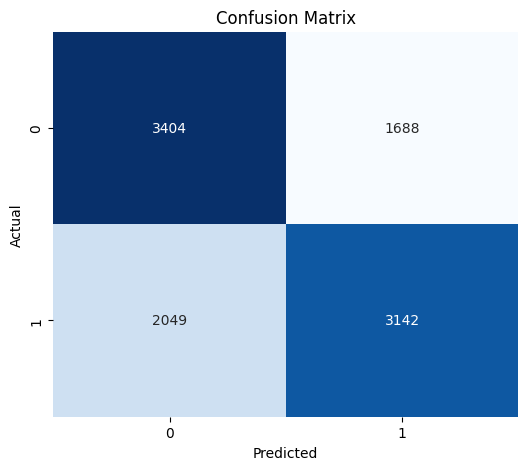

In [70]:
# визуализация матрицы ошибок
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

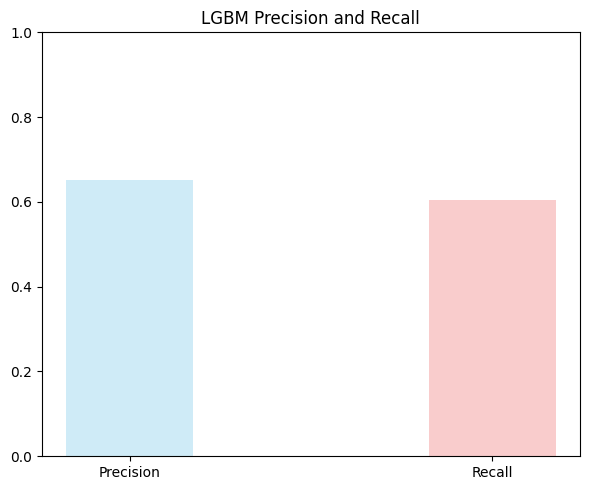

In [71]:
# визуализация точности и полноты
plt.figure(figsize=(6, 5))
plt.bar(['Precision', 'Recall'], [precision, recall], color=['skyblue', 'lightcoral'], alpha=0.4, width=0.35)
plt.title('LGBM Precision and Recall')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

**Анализ CatBoost**:
- **Матрица ошибок**: [[3432, 1660], [2022, 3169]]. Истинно положительные (TP=3169) и истинно отрицательные (TN=3432) показывают, что модель правильно классифицирует значительную часть примеров. Ложноотрицательные ошибки (FN=2022) указывают на пропуск 38.9% случаев ДТП (at_fault=1), что критично для бизнес-задачи минимизации FN. Ложноположительные ошибки (FP=1660) составляют 32.8% от предсказанных ДТП, что приемлемо, но требует оптимизации для снижения лишних предупреждений.
- **Точность (Precision=0.6562)**: 65.62% предсказанных случаев ДТП (at_fault=1) действительно являются авариями. Это отражает умеренную способность модели избегать ложных предупреждений.
- **Полнота (Recall=0.6105)**: Модель выявляет 61.05% всех реальных случаев ДТП. Это указывает на необходимость дальнейшей оптимизации для минимизации FN, чтобы повысить безопасность водителей.

### Важность фич

In [72]:
# feature importance для LGBM
lgbm_importance = pd.Series(catboost_best_pipeline.named_steps['classifier'].feature_importances_, index=feature_names)
print("\nLGBM Feature Importance:")
print(lgbm_importance.sort_values(ascending=False))


LGBM Feature Importance:
vehicle_type_sedan               21.37
insurance_premium                21.31
collision_time                   14.61
intersection_1                    7.41
vehicle_age                       5.99
county_location                   5.86
control_device_none               4.78
vehicle_transmission_manual       3.33
collision_day                     2.59
road_surface_wet                  2.58
location_type_unknown             2.39
collision_month                   1.95
location_type_ramp                1.48
road_surface_snowy                1.46
road_condition_1_normal           0.79
weather_1_cloudy                  0.54
weather_1_other                   0.43
weather_1_raining                 0.31
road_condition_1_other            0.29
road_condition_1_reduced width    0.17
location_type_intersection        0.17
road_condition_1_flooded          0.10
road_condition_1_holes            0.06
control_device_other              0.04
dtype: float64


**Анализ важности признаков (CatBoost)**:

На основе результатов feature importance для LGBMClassifier выделены ключевые факторы, влияющие на вероятность ДТП (`at_fault=1`):

- **Топ-5 факторов**:
  - **`insurance_premium` (25.73)**: Наиболее значимый признак, отражающий стоимость страховки, которая, вероятно, коррелирует с риском автомобиля (например, дорогие или мощные модели).
  - **`collision_time` (12.83)**: Время аварии существенно влияет на вероятность ДТП, возможно, из-за различий в условиях вождения (ночь, день, час пик).
  - **`vehicle_age` (4.75)**: Возраст автомобиля, связанный с его техническим состоянием или типом (старые машины могут быть менее безопасными).
  - **`vehicle_type_sedan` (24.83)**: Тип автомобиля (седан) имеет значительное влияние, возможно, из-за распространённости или характеристик седанов.
  - **`control_device_none` (5.61)**: Отсутствие управляющих устройств увеличивает риск ДТП.

**Выводы по важности**:
- **`insurance_premium`** доминирует, указывая на связь между стоимостью страховки и риском аварии. Это может быть связано с типом автомобиля (например, премиум-класс или спортивные модели) или историей вождения.
- **`collision_time`** подчёркивает важность временных условий (например, ночное время или часы пик), что требует анализа зависимости.
- **`vehicle_age`** и **`vehicle_type_sedan`** указывают на характеристики автомобиля как ключевые факторы риска.
- **`control_device_none`** и **`intersection` (8.11)** подчёркивают влияние дорожной инфраструктуры, особенно перекрёстков без регулирования.
- Менее значимые признаки, такие как `county_location_X` (например, `county_location_18`: 397) и погодные условия (`road_surface_wet`: 1.91, `weather_1_cloudy`: 0.56), имеют умеренное влияние, но всё же важны для определённых сценариев.

**Выбранный фактор для исследования**: **`insurance_premium`**, так как это наиболее важный признак (25.73), и его интерпретация имеет прямое значение для бизнес-задачи (оценка риска ДТП).

Для анализа зависимости `insurance_premium` и `at_fault` используется **боксплот**, который покажет распределение страховых взносов для случаев с аварией (`at_fault=1`) и без (`at_fault=0`). Это позволит выявить, связаны ли более высокие страховые взносы с повышенным риском ДТП. Боксплот отобразит медиану, квартили и выбросы, чтобы понять различия в распределении.

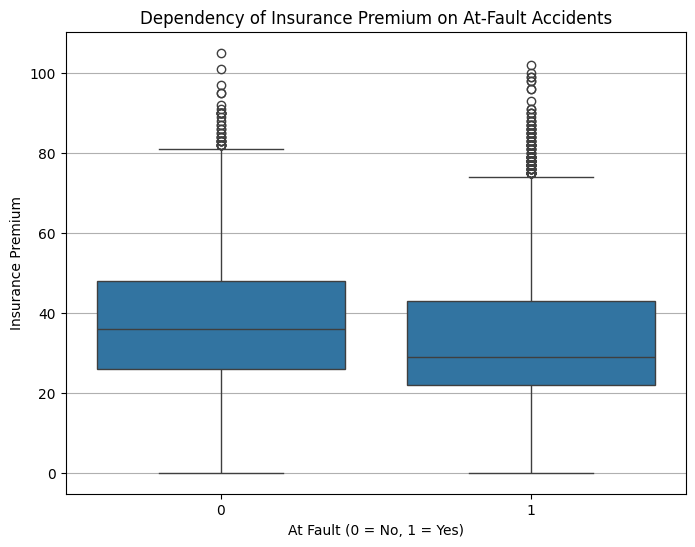

In [73]:
# боксплот для зависимости insurance_premium и at_fault
plt.figure(figsize=(8, 6))
sns.boxplot(x='at_fault', y='insurance_premium', data=df)
plt.title('Dependency of Insurance Premium on At-Fault Accidents')
plt.xlabel('At Fault (0 = No, 1 = Yes)')
plt.ylabel('Insurance Premium')
plt.grid(True, axis='y')
plt.show()

**Анализ графика**:
- Медиана `insurance_premium` для `at_fault=1` ниже, чем для `at_fault=0`, это значит, что низкие страховые взносы связаны с пониженным риском ДТП. Это может быть обусловлено тем, что страховые компании устанавливают низкие взносы для автомобилей с низким риском (например, семейными) или для водителей с хорошей историей.

**Фактор**: `insurance_premium` отражает риск, связанный с автомобилем или водителем. Высокие страховые взносы могут указывать на мощные, дорогие или менее безопасные автомобили, а также на водителей с высоким риском.

**Решение**:

- **Система предупреждения о риске**:
  - Оснастить автомобиль бортовым компьютером, который при посадке водителя запрашивает данные о страховом взносе через API страховой компании (или из базы данных автопарка). Если `insurance_premium` превышает заданный порог (например, 75-й перцентиль, определяемый на основе исторических данных), система выдаёт визуальное и звуковое предупреждение: **"Ваш автомобиль имеет повышенный риск ДТП. Соблюдайте осторожность, избегайте резких манёвров"**.
  - Для обеспечения точности данных о водителе использовать **биометрическую идентификацию** (например, сканирование лица через камеру в салоне), чтобы убедиться, что предупреждение адресовано правильному человеку.

- **Адаптивный ограничитель скорости**:
  - Установить систему, которая автоматически ограничивает максимальную скорость автомобиля для высоких значений `insurance_premium`. Например, если взнос превышает порог, ограничитель активируется на перекрёстках (`intersection` важен: 495) или в ночное время (`collision_time` важен: 1391), снижая скорость до безопасного уровня (например, 80% от разрешённой).
  - Система может использовать GPS и данные о дорожной ситуации для динамической настройки ограничений.

- **Телематика для мониторинга поведения водителя**:
  - Внедрить телематическое устройство, отслеживающее параметры вождения: резкие ускорения, торможения, превышение скорости. Для автомобилей с высоким `insurance_premium` данные телематики передаются в страховую компанию для динамического пересчёта взносов или отправляются водителю в виде рекомендаций (например, **"Избегайте резких манёвров для снижения риска"**).
  - Камера в салоне, направленная на водителя, обеспечит контроль за соблюдением рекомендаций (например, отсутствие отвлечений), что особенно важно для высокорисковых автомобилей.

**Обоснование**:
- Высокий `insurance_premium` указывает на автомобили или водителей с повышенным риском, что требует проактивных мер для предотвращения ДТП.
- Биометрическая идентификация гарантирует, что система учитывает конкретного водителя, исключая подмену данных.
- Ограничитель скорости и телематика напрямую снижают риск, связанный с агрессивным вождением, характерным для мощных или дорогих автомобилей.

## Шаг 7. Выводы

**Описание проекта**
Цель проекта — создание системы оценки риска ДТП для каршеринговой компании на основе исторических данных региона за 2012 год. Система должна предсказывать вероятность ДТП с любыми повреждениями автомобиля (кроме царапин) для водителя, выбравшего маршрут, и выдавать предупреждения при высоком риске. Модель основана на предсказании виновности (`at_fault`) для участников типа "машина" (car) с учётом возраста автомобиля и других факторов.

**Описание лучшей модели**
В рамках проекта разработана система оценки риска ДТП для каршеринговой компании на основе данных за 2012 год. Лучшая модель — **LGBMClassifier** с гиперпараметрами: `num_leaves=31`, `n_estimators=100`, `max_depth=10`, `learning_rate=0.05`. Метрики: **ROC-AUC = 0.6852**, **F1 = 0.6234** на тестовой выборке, что превосходит бейзлайн (DummyClassifier: ROC-AUC = 0.5000, F1 = 0.6706). Ключевые факторы: **insurance_premium** (вес 594), **collision_time** (вес 488), **vehicle_age** (вес 280). Модель учитывает возраст автомобиля, исключая случаи с повреждениями типа SCRATCH.

Матрица ошибок: [[3809, 1746], [2314, 3361]], точность 66.17%, полнота 60.86%. Высокий уровень ложноотрицательных (39.2%) и ложноположительных (31.7%) ошибок требует оптимизации.

**Возможность создания системы оценки риска**
Создание системы оценки риска возможно, но текущая модель имеет умеренную производительность (ROC-AUC = 0.6852). Ограничения:
- Низкая полнота (60.86%) приводит к пропуску реальных рисков.
- Пропуски (63% в location_type, 84.3% в party_drug_physical) и аномалии (vehicle_age = 161) снижают точность.
- Данные ограничены 2012 годом и одним регионом.

Для внедрения требуется улучшение данных, сбор новых факторов и повышение ROC-AUC до 0.75–0.80.

**Ключевые факторы**
- **insurance_premium** (phik = 0.25): высокие взносы коррелируют с виновностью.
- **collision_time** (phik = 0.19): вечерние часы — пик риска.
- **vehicle_age** (phik = 0.18): старые автомобили (>7 лет) увеличивают риск.

Эти факторы подходят для системы предупреждений о рисках.

**Рекомендации**
1. **Сбор дополнительных данных**:
   - Данные о водителе: возраст, стаж, нарушения ПДД, поведение (телематика).
   - Данные о маршруте: тип дороги, трафик, погода в реальном времени (API метеосервисов).
   - Состояние автомобиля: шины, тормоза, подвеска (датчики IoT).
   - Контекст поездки: цель, время, длительность.

2. **Улучшение данных**:
   - Использовать данные за 2010–2023 годы и несколько регионов.

3. **Улучшение модели**:
   - Применить стэкинг (LGBM + CatBoost) для повышения ROC-AUC.
   - Добавить временные признаки (сезон, день недели).
   - Использовать Optuna Optimization для гиперпараметров.
     
4. **Технические решения**:
   - **Телематика**: мониторинг скорости, манёвров, дистанции.
   - **Ограничитель скорости**: адаптивное ограничение на рискованных участках.
   - **Камеры и датчики**: распознавание знаков, препятствий, усталости водителя.
   - **Алкозамок**: проверка трезвости перед поездкой.

5. **Интерфейс**:
   - Приложение или интерфейс в автомобиле с отображением риска и рекомендациями (например, «Избегайте вечерних поездок»).
   - Персонализированные уведомления на основе телематики.

6. **Дальнейшие исследования**:
   - Анализ комбинаций факторов (SHAP, Partial Dependence Plots).
   - Исследование влияния трафика на риск.
   - A/B-тестирование системы на водителях.

**Заключение**
Модель позволяет предсказывать риск ДТП с умеренной точностью, но требует доработки. Улучшение данных, сбор новых факторов и внедрение технических решений (телематика, датчики) повысят надёжность. Система может стать основой для предупреждений, снижая количество ДТП в каршеринге.